# Deep Learning - Plots

## Libraries

In [382]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.gridspec import GridSpec
from scipy.stats import linregress
import seaborn as sns
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jorge\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Análisis General

#### Load Training Data

In [383]:
# {'Comentario Positivo': 0, 'Comentario Negativo': 1}
# Define the list of labels and colors
labels = ['Comentario Positivo', 'Comentario Negativo']
colors = ['darkgreen', 'darkred']

In [384]:
# Load the Excel file
path = "DL2_Análisis General.xlsx"
df_AG_SC = pd.read_excel(path, sheet_name="Sin_contexto")
df_AG_TC = pd.read_excel(path, sheet_name="Tweet_context")
df_AG_FC = pd.read_excel(path, sheet_name="Full_context")

In [385]:
# Rename columns to categorical: {'Comentario Positivo': 0, 'Comentario Negativo': 1}
mapping = {'Comentario Positivo': 0, 'Comentario Negativo': 1}

# Create a dictionary for renaming
rename_dict = {}
for key, value in mapping.items():
    rename_dict[f'eval_{value}_precision'] = f'eval_{key}_precision'
    rename_dict[f'eval_{value}_recall'] = f'eval_{key}_recall'
    rename_dict[f'eval_{value}_f1'] = f'eval_{key}_f1-score'
    rename_dict[f'eval_{value}_support'] = f'eval_{key}_support'

# Rename the columns
df_AG_SC.rename(columns=rename_dict, inplace=True)
df_AG_TC.rename(columns=rename_dict, inplace=True)
df_AG_FC.rename(columns=rename_dict, inplace=True)

In [386]:
# Añadir la nueva columna 'Context' a cada DataFrame
df_AG_SC['Context'] = 'Without Context'
df_AG_TC['Context'] = 'Tweet Context'
df_AG_FC['Context'] = 'Full Context'

# Concatenar los tres DataFrames
df_AG_join = pd.concat([df_AG_SC[['Model_Description', 'Total Time', 'Context', 'eval_weighted_f1', f'eval_{labels[0]}_f1-score', f'eval_{labels[1]}_f1-score', 'eval_accuracy']], 
                         df_AG_TC[['Model_Description', 'Total Time', 'Context', 'eval_weighted_f1', f'eval_{labels[0]}_f1-score', f'eval_{labels[1]}_f1-score', 'eval_accuracy']], 
                         df_AG_FC[['Model_Description', 'Total Time', 'Context', 'eval_weighted_f1', f'eval_{labels[0]}_f1-score', f'eval_{labels[1]}_f1-score', 'eval_accuracy']]])



df_AG_join

,Model_Description,Total Time,Context,eval_weighted_f1,eval_Comentario Positivo_f1-score,eval_Comentario Negativo_f1-score,eval_accuracy
0,FacebookAI/xlm-roberta-base,16751.834961,Without Context,0.912376,0.945591,0.794326,0.913947
1,bert-base-multilingual-cased,9391.908353,Without Context,0.891946,0.928709,0.761290,0.890208
2,dccuchile/bert-base-spanish-wwm-cased,8210.334813,Without Context,0.902490,0.940299,0.768116,0.905045
3,PlanTL-GOB-ES/roberta-large-bne,23162.986902,Without Context,0.881500,0.927103,0.719424,0.884273
0,PlanTL-GOB-ES/roberta-large-bne,50308.012885,Tweet Context,0.904574,0.939394,0.780822,0.905045
1,bert-base-multilingual-cased,8523.359113,Tweet Context,0.911809,0.942529,0.802632,0.910979
2,dccuchile/bert-base-spanish-wwm-cased,7737.376093,Tweet Context,0.897341,0.932821,0.771242,0.896142
3,FacebookAI/xlm-roberta-base,9980.871516,Tweet Context,0.915309,0.944123,0.812903,0.913947
0,bert-base-multilingual-cased,13940.502080,Full Context,0.900051,0.934866,0.776316,0.899110
1,dccuchile/bert-base-spanish-wwm-cased,12331.272519,Full Context,0.915664,0.943907,0.815287,0.913947


#### F1 Score

In [387]:
# Filter to include only numeric columns
numeric_cols = ['eval_weighted_f1', f'eval_{labels[0]}_f1-score', f'eval_{labels[1]}_f1-score', 'eval_accuracy', 'Total Time']

# Group the data by 'Context' and calculate the mean for numeric columns
context_grouped = df_AG_join.groupby('Context')[numeric_cols].max().reset_index()

# Reorder the contexts
context_grouped['Context'] = pd.Categorical(context_grouped['Context'], categories=['Without Context', 'Tweet Context', 'Full Context'], ordered=True)

context_grouped

,Context,eval_weighted_f1,eval_Comentario Positivo_f1-score,eval_Comentario Negativo_f1-score,eval_accuracy,Total Time
0,Full Context,0.915664,0.943907,0.815287,0.913947,17810.895127
1,Tweet Context,0.915309,0.944123,0.812903,0.913947,50308.012885
2,Without Context,0.912376,0.945591,0.794326,0.913947,23162.986902


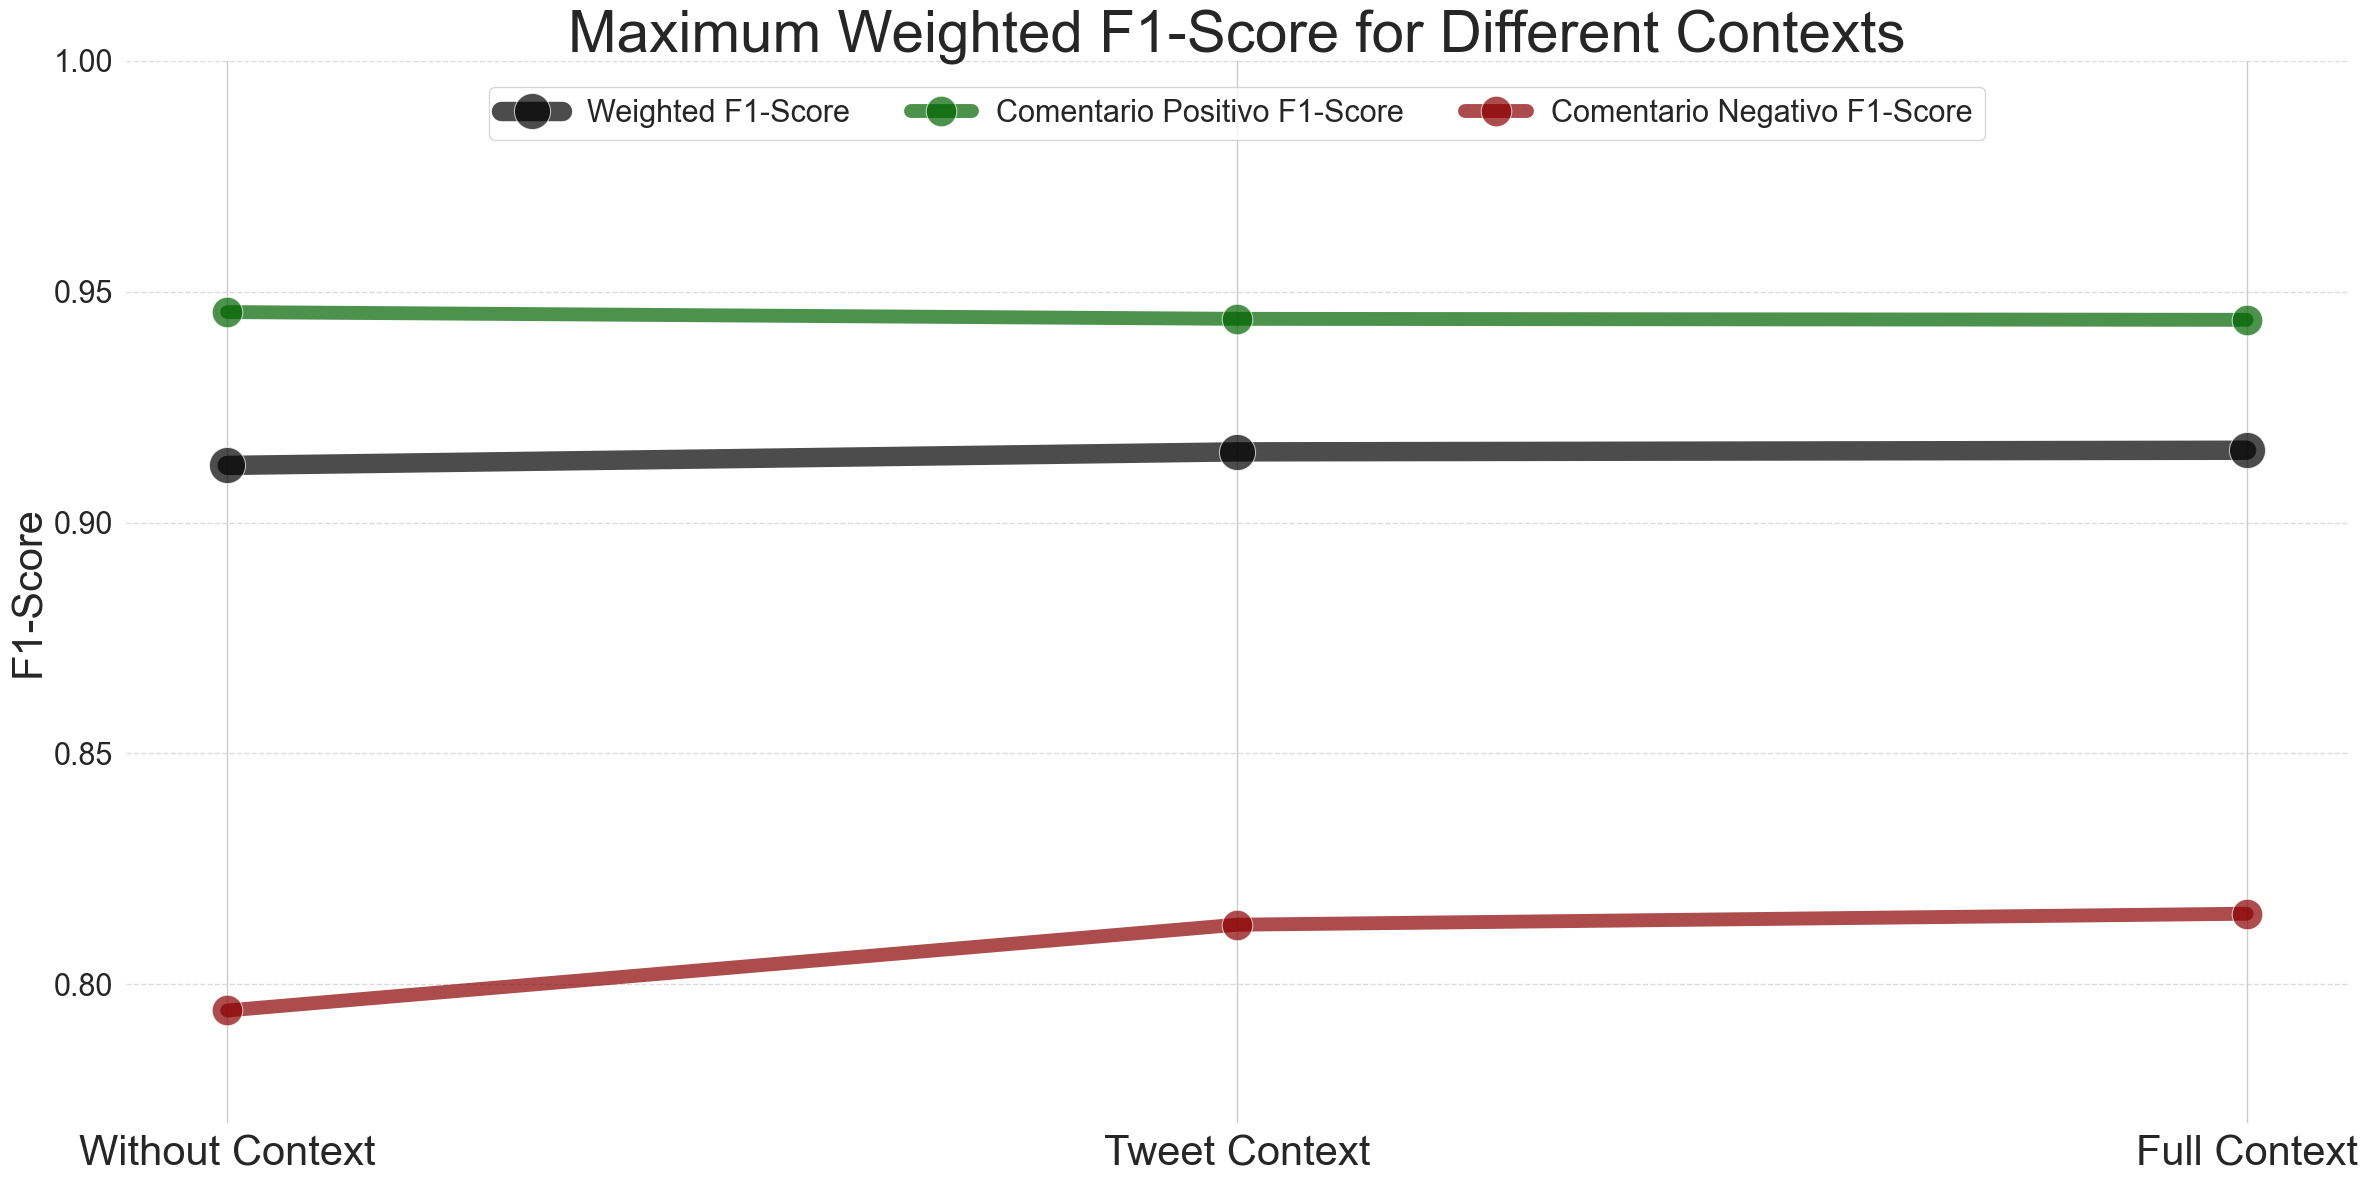

In [388]:
# Set Seaborn style
sns.set(style="whitegrid")

# Calculate the upper limit for the y-axis dynamically
y_max = 1.05

# Create a figure with subplots using GridSpec
fig = plt.figure(figsize=(24, 12))
gs = GridSpec(1, 1, figure=fig)

# Plot
ax1 = fig.add_subplot(gs[0, 0])

# Plot lines
sns.lineplot(ax=ax1, x='Context', y='eval_weighted_f1', data=context_grouped, marker='o', linewidth=14, markersize=26, alpha=0.7, color="black", label="Weighted F1-Score")
for i, label in enumerate(labels):
    sns.lineplot(ax=ax1, x='Context', y=f'eval_{label}_f1-score', data=context_grouped, marker='o', linewidth=10, markersize=22, alpha=0.7, color=colors[i], label=f"{label} F1-Score")

ax1.set_title('Maximum Weighted F1-Score for Different Contexts', fontsize=42)
ax1.set_xlabel('', fontsize=18)
ax1.set_ylabel('F1-Score', fontsize=30)
ax1.tick_params(axis='x', labelsize=30)
ax1.tick_params(axis='y', labelsize=22)
ax1.set_ylim(0.77, 1)

# Move legend to the top
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 0.99), ncol=4, fontsize=22)

# Add a grid to improve readability
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Remove spines for a clean look
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)

# Show the plot
plt.tight_layout()

# Save the plot as a PDF file
plt.savefig("../../../IMAGES/Análisis General/DL/DL_Experiments in _Análisis General_ weightedF1_max.pdf", format='pdf')

plt.show()

C:\Users\jorge\AppData\Local\Temp\ipykernel_36740\3653274714.py:13: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.5}` instead.

  sns.barplot(ax=ax1, x='Context', y='eval_weighted_f1', hue='Model_Description', data=df_AG_join, palette='crest_r', errorbar=('ci', 95), errwidth=1.5, capsize=0.2, alpha=0.7)


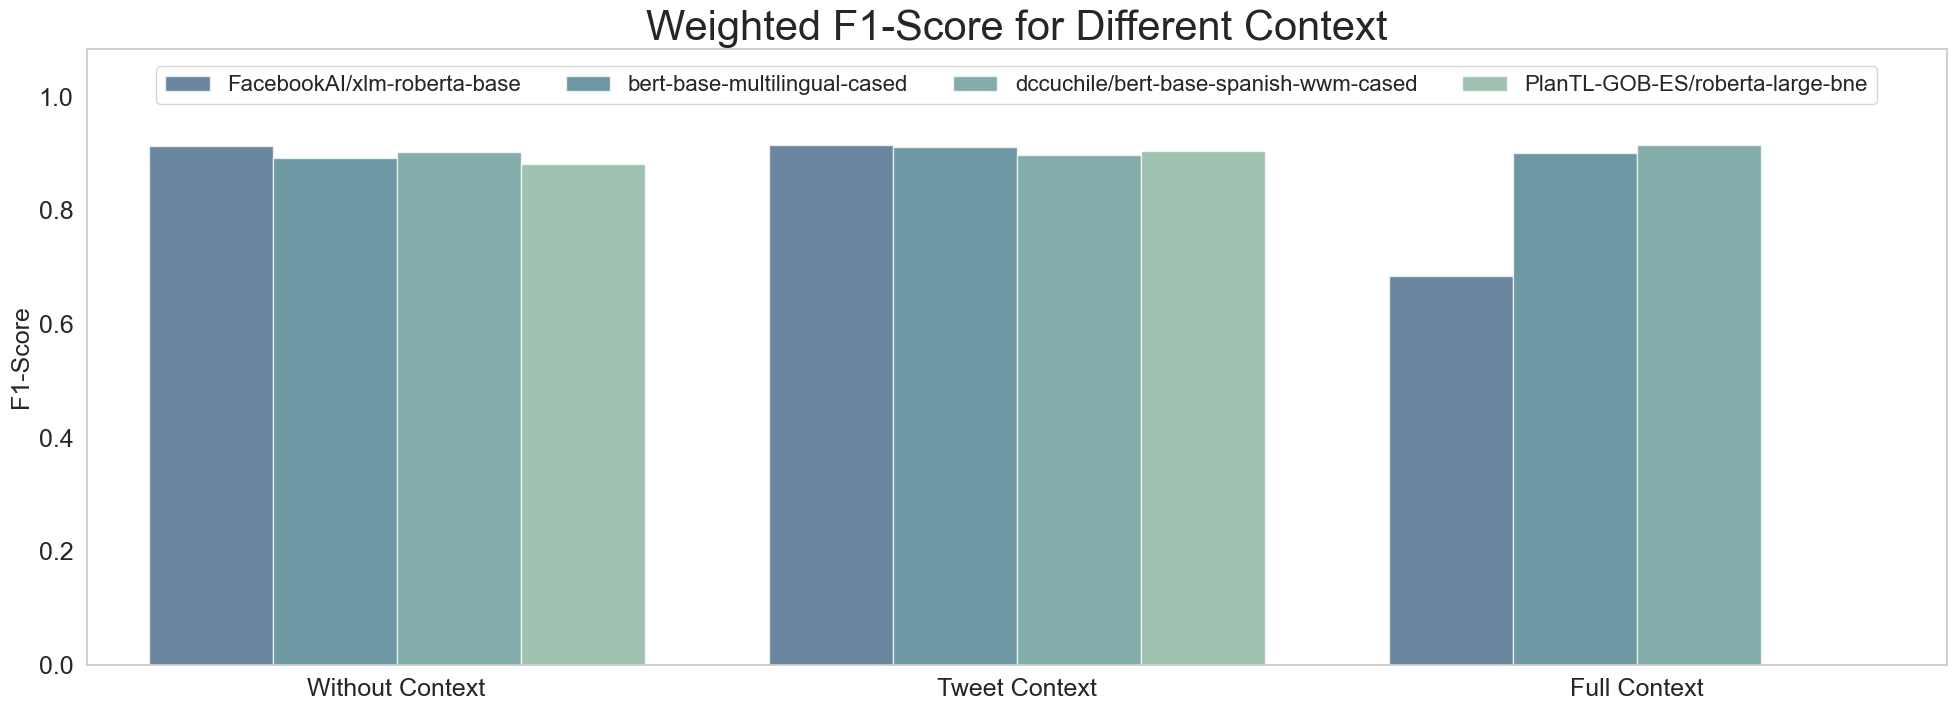

In [389]:
# Set Seaborn style
sns.set(style="whitegrid")

# Calculate the upper limit for the y-axis dynamically
y_max = df_AG_join['eval_weighted_f1'].mean() + 3 * df_AG_join['eval_weighted_f1'].std()

# Create a figure with subplots using GridSpec
fig = plt.figure(figsize=(24, 8))
gs = GridSpec(1, 1, figure=fig)

# Plot for MODELS
ax1 = fig.add_subplot(gs[0, 0])
sns.barplot(ax=ax1, x='Context', y='eval_weighted_f1', hue='Model_Description', data=df_AG_join, palette='crest_r', errorbar=('ci', 95), errwidth=1.5, capsize=0.2, alpha=0.7)
ax1.set_title('Weighted F1-Score for Different Context', fontsize=30)
ax1.set_xlabel('', fontsize=18)
ax1.set_ylabel('F1-Score', fontsize=18)
ax1.tick_params(axis='x', labelsize=18)
ax1.tick_params(axis='y', labelsize=18)
ax1.set_ylim(0, y_max)

# Remove grid
ax1.grid(False)

# Move legend to the top
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 0.99), ncol=4, fontsize=16)




C:\Users\jorge\AppData\Local\Temp\ipykernel_36740\2995587177.py:13: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.5}` instead.

  sns.barplot(ax=ax1, x='Context', y=f'eval_{labels[0]}_f1-score', hue='Model_Description', data=df_AG_join, palette='Greens_d', errorbar=('ci', 95), errwidth=1.5, capsize=0.2, alpha=0.7)


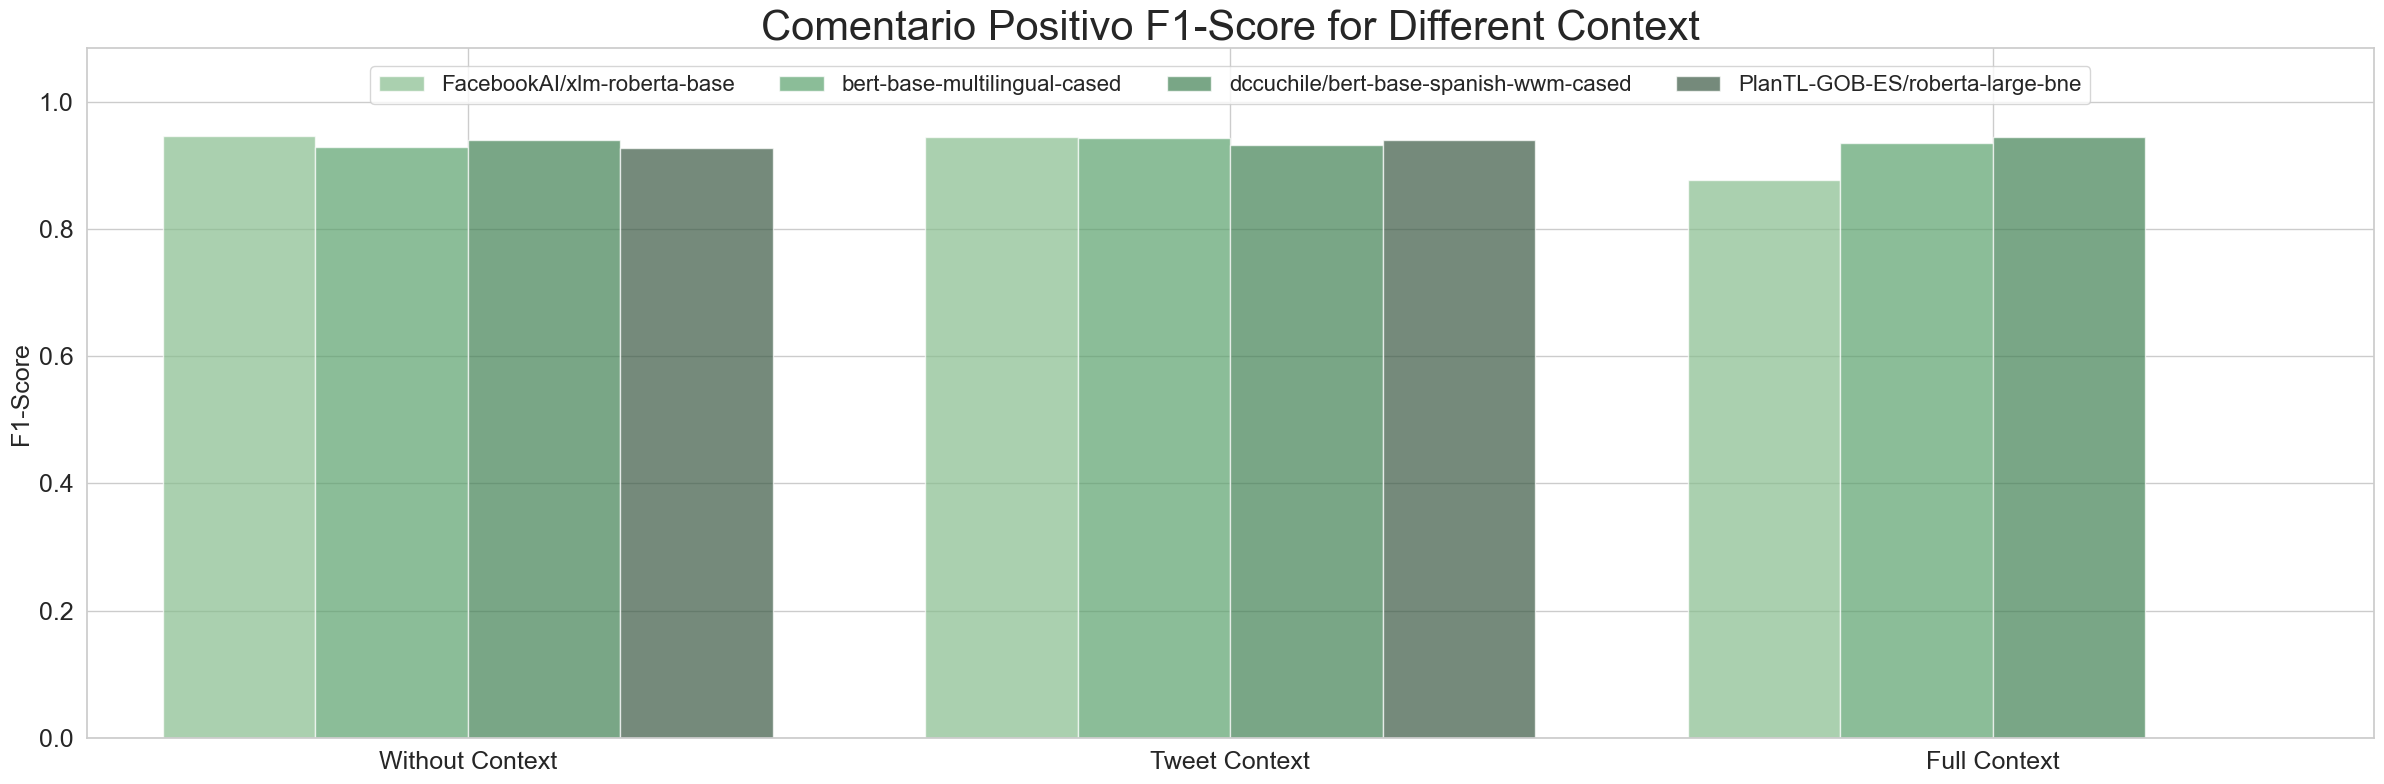

In [390]:
# Set Seaborn style
sns.set(style="whitegrid")

# Calculate the upper limit for the y-axis dynamically
y_max = df_AG_join['eval_weighted_f1'].mean() + 3 * df_AG_join['eval_weighted_f1'].std()

# Create a figure with subplots using GridSpec
fig = plt.figure(figsize=(24, 8))
gs = GridSpec(1, 1, figure=fig)

# Plot for MODELS
ax1 = fig.add_subplot(gs[0, 0])
sns.barplot(ax=ax1, x='Context', y=f'eval_{labels[0]}_f1-score', hue='Model_Description', data=df_AG_join, palette='Greens_d', errorbar=('ci', 95), errwidth=1.5, capsize=0.2, alpha=0.7)
ax1.set_title('Comentario Positivo F1-Score for Different Context', fontsize=30)
ax1.set_xlabel('', fontsize=18)
ax1.set_ylabel('F1-Score', fontsize=18)
ax1.tick_params(axis='x', labelsize=18)
ax1.tick_params(axis='y', labelsize=18)
ax1.set_ylim(0, y_max)

# Remove grid
ax1.grid(False)

# Move legend to the top
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 0.99), ncol=4, fontsize=16)

# Adding grid for better readability
ax1.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


C:\Users\jorge\AppData\Local\Temp\ipykernel_36740\1411237486.py:13: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.5}` instead.

  sns.barplot(ax=ax1, x='Context', y=f'eval_{labels[1]}_f1-score', hue='Model_Description', data=df_AG_join, palette='Reds', errorbar=('ci', 95), errwidth=1.5, capsize=0.2, alpha=0.7)


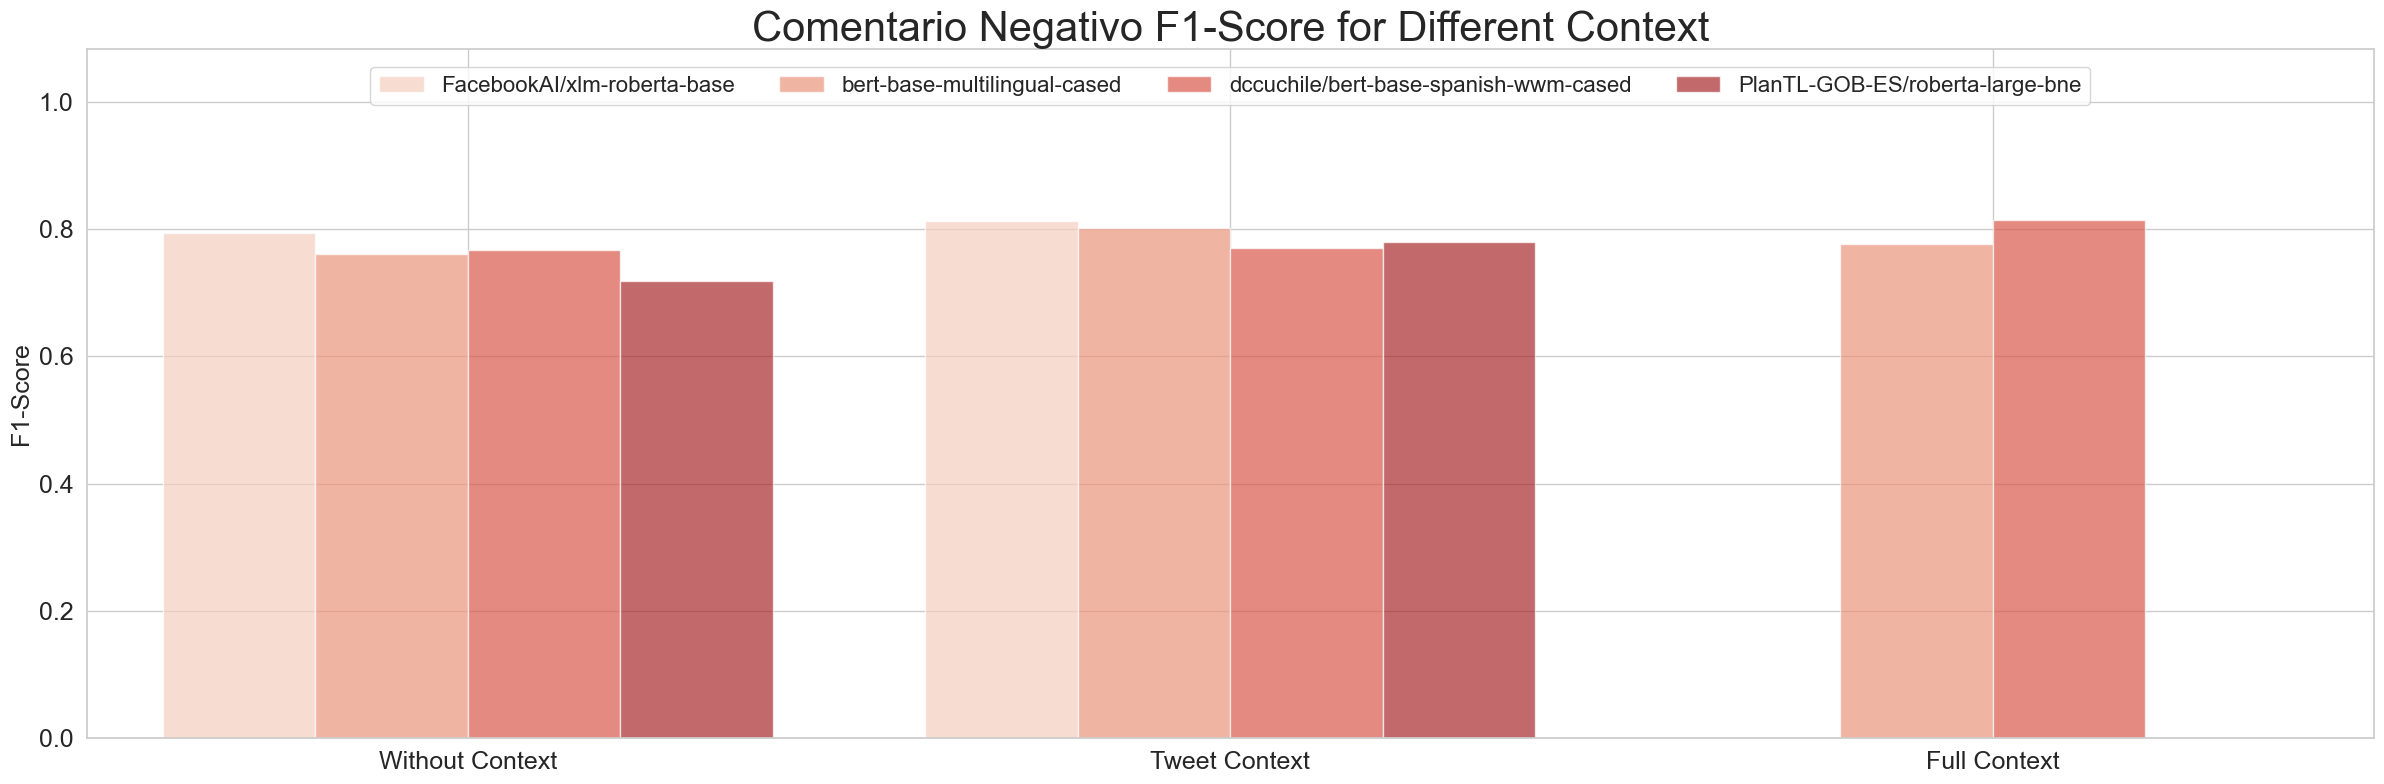

In [391]:
# Set Seaborn style
sns.set(style="whitegrid")

# Calculate the upper limit for the y-axis dynamically
y_max = df_AG_join['eval_weighted_f1'].mean() + 3 * df_AG_join['eval_weighted_f1'].std()

# Create a figure with subplots using GridSpec
fig = plt.figure(figsize=(24, 8))
gs = GridSpec(1, 1, figure=fig)

# Plot for MODELS
ax1 = fig.add_subplot(gs[0, 0])
sns.barplot(ax=ax1, x='Context', y=f'eval_{labels[1]}_f1-score', hue='Model_Description', data=df_AG_join, palette='Reds', errorbar=('ci', 95), errwidth=1.5, capsize=0.2, alpha=0.7)
ax1.set_title('Comentario Negativo F1-Score for Different Context', fontsize=30)
ax1.set_xlabel('', fontsize=18)
ax1.set_ylabel('F1-Score', fontsize=18)
ax1.tick_params(axis='x', labelsize=18)
ax1.tick_params(axis='y', labelsize=18)
ax1.set_ylim(0, y_max)

# Remove grid
ax1.grid(False)

# Move legend to the top
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 0.99), ncol=4, fontsize=16)

# Adding grid for better readability
ax1.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


#### Performance (Time)

C:\Users\jorge\AppData\Local\Temp\ipykernel_36740\1419680052.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(ax=ax1, x='Context', y='Total Time', hue='Model_Description', data=df_AG_join, palette='crest_r', alpha=0.7, ci=None)


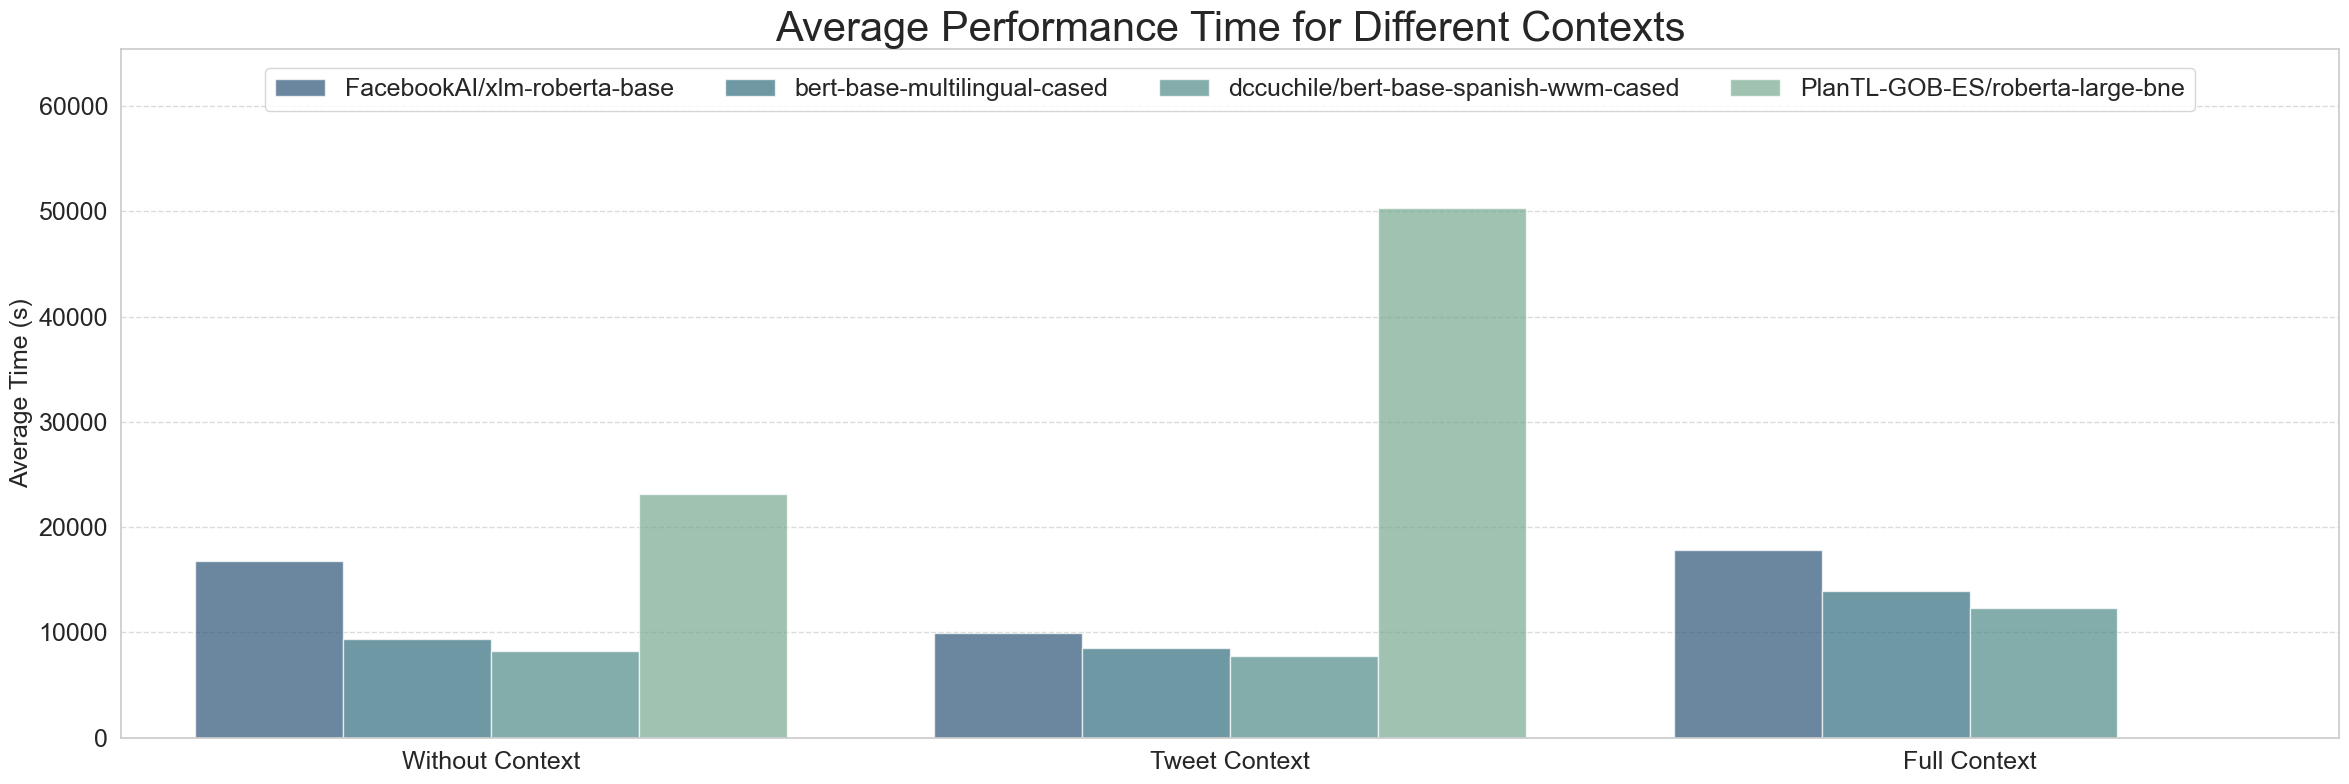

In [392]:
# Set Seaborn style
sns.set(style="whitegrid")

# Calculate the upper limit for the y-axis dynamically
y_max = df_AG_join['Total Time'].mean() + 4 * df_AG_join['Total Time'].std()

# Create a figure with subplots using GridSpec
fig = plt.figure(figsize=(24, 8))
gs = GridSpec(1, 1, figure=fig)

# Plot for MODELS
ax1 = fig.add_subplot(gs[0, 0])
sns.barplot(ax=ax1, x='Context', y='Total Time', hue='Model_Description', data=df_AG_join, palette='crest_r', alpha=0.7, ci=None)
ax1.set_title('Average Performance Time for Different Contexts', fontsize=30)
ax1.set_xlabel('', fontsize=18)
ax1.set_ylabel('Average Time (s)', fontsize=18)
ax1.tick_params(axis='x', labelsize=18)
ax1.tick_params(axis='y', labelsize=18)
ax1.set_ylim(0, y_max)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Move legend to the top
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 0.99), ncol=4, fontsize=18)


# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()



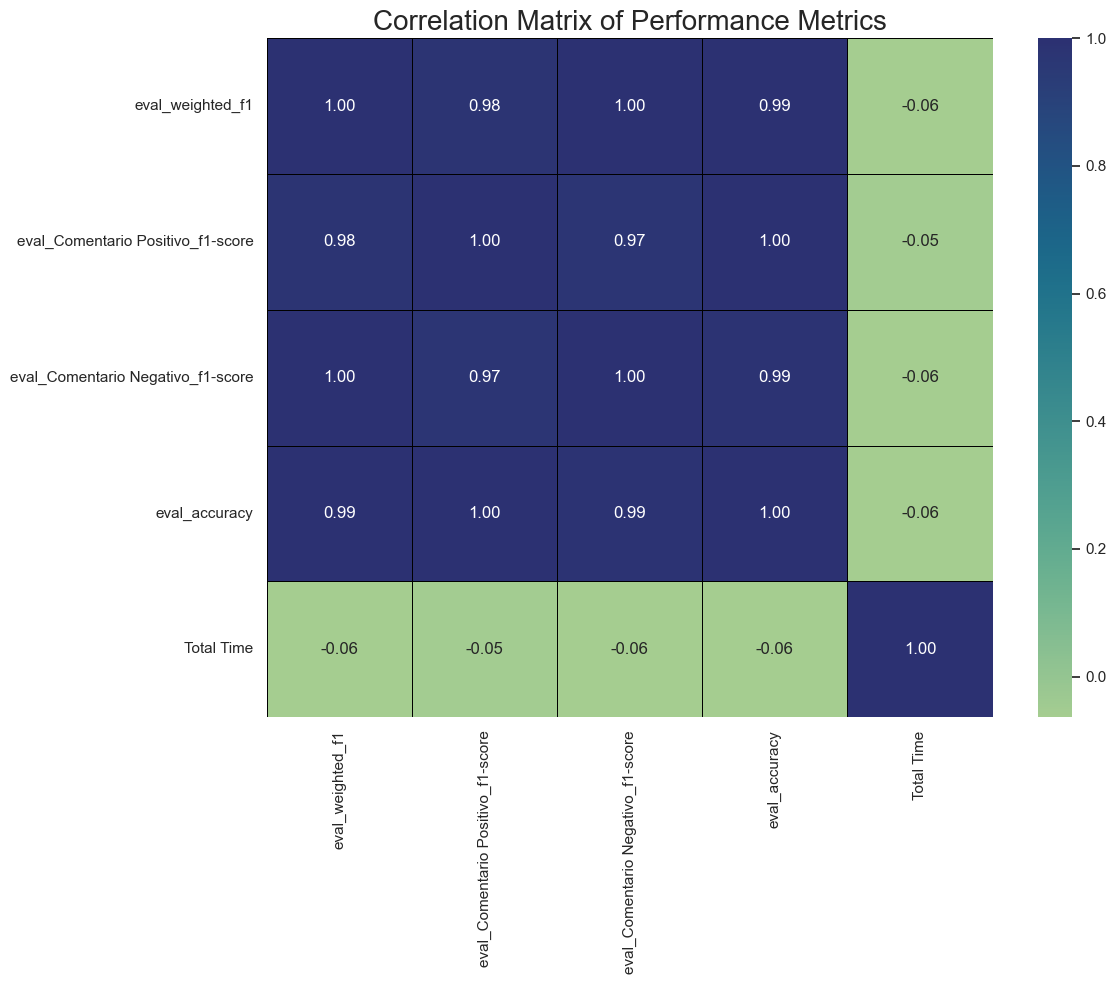

In [393]:
# Calculate the correlation matrix
correlation_matrix = df_AG_join[['eval_weighted_f1', f'eval_{labels[0]}_f1-score', f'eval_{labels[1]}_f1-score', 'eval_accuracy', 'Total Time']].corr()

# Set Seaborn style
sns.set(style="whitegrid")

# Create a heatmap for the correlation matrix
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='crest', fmt='.2f', linewidths=0.5, linecolor='black')

# Set title and labels
plt.title('Correlation Matrix of Performance Metrics', fontsize=20)
plt.yticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()


#### Confussion Matrix - Best Model

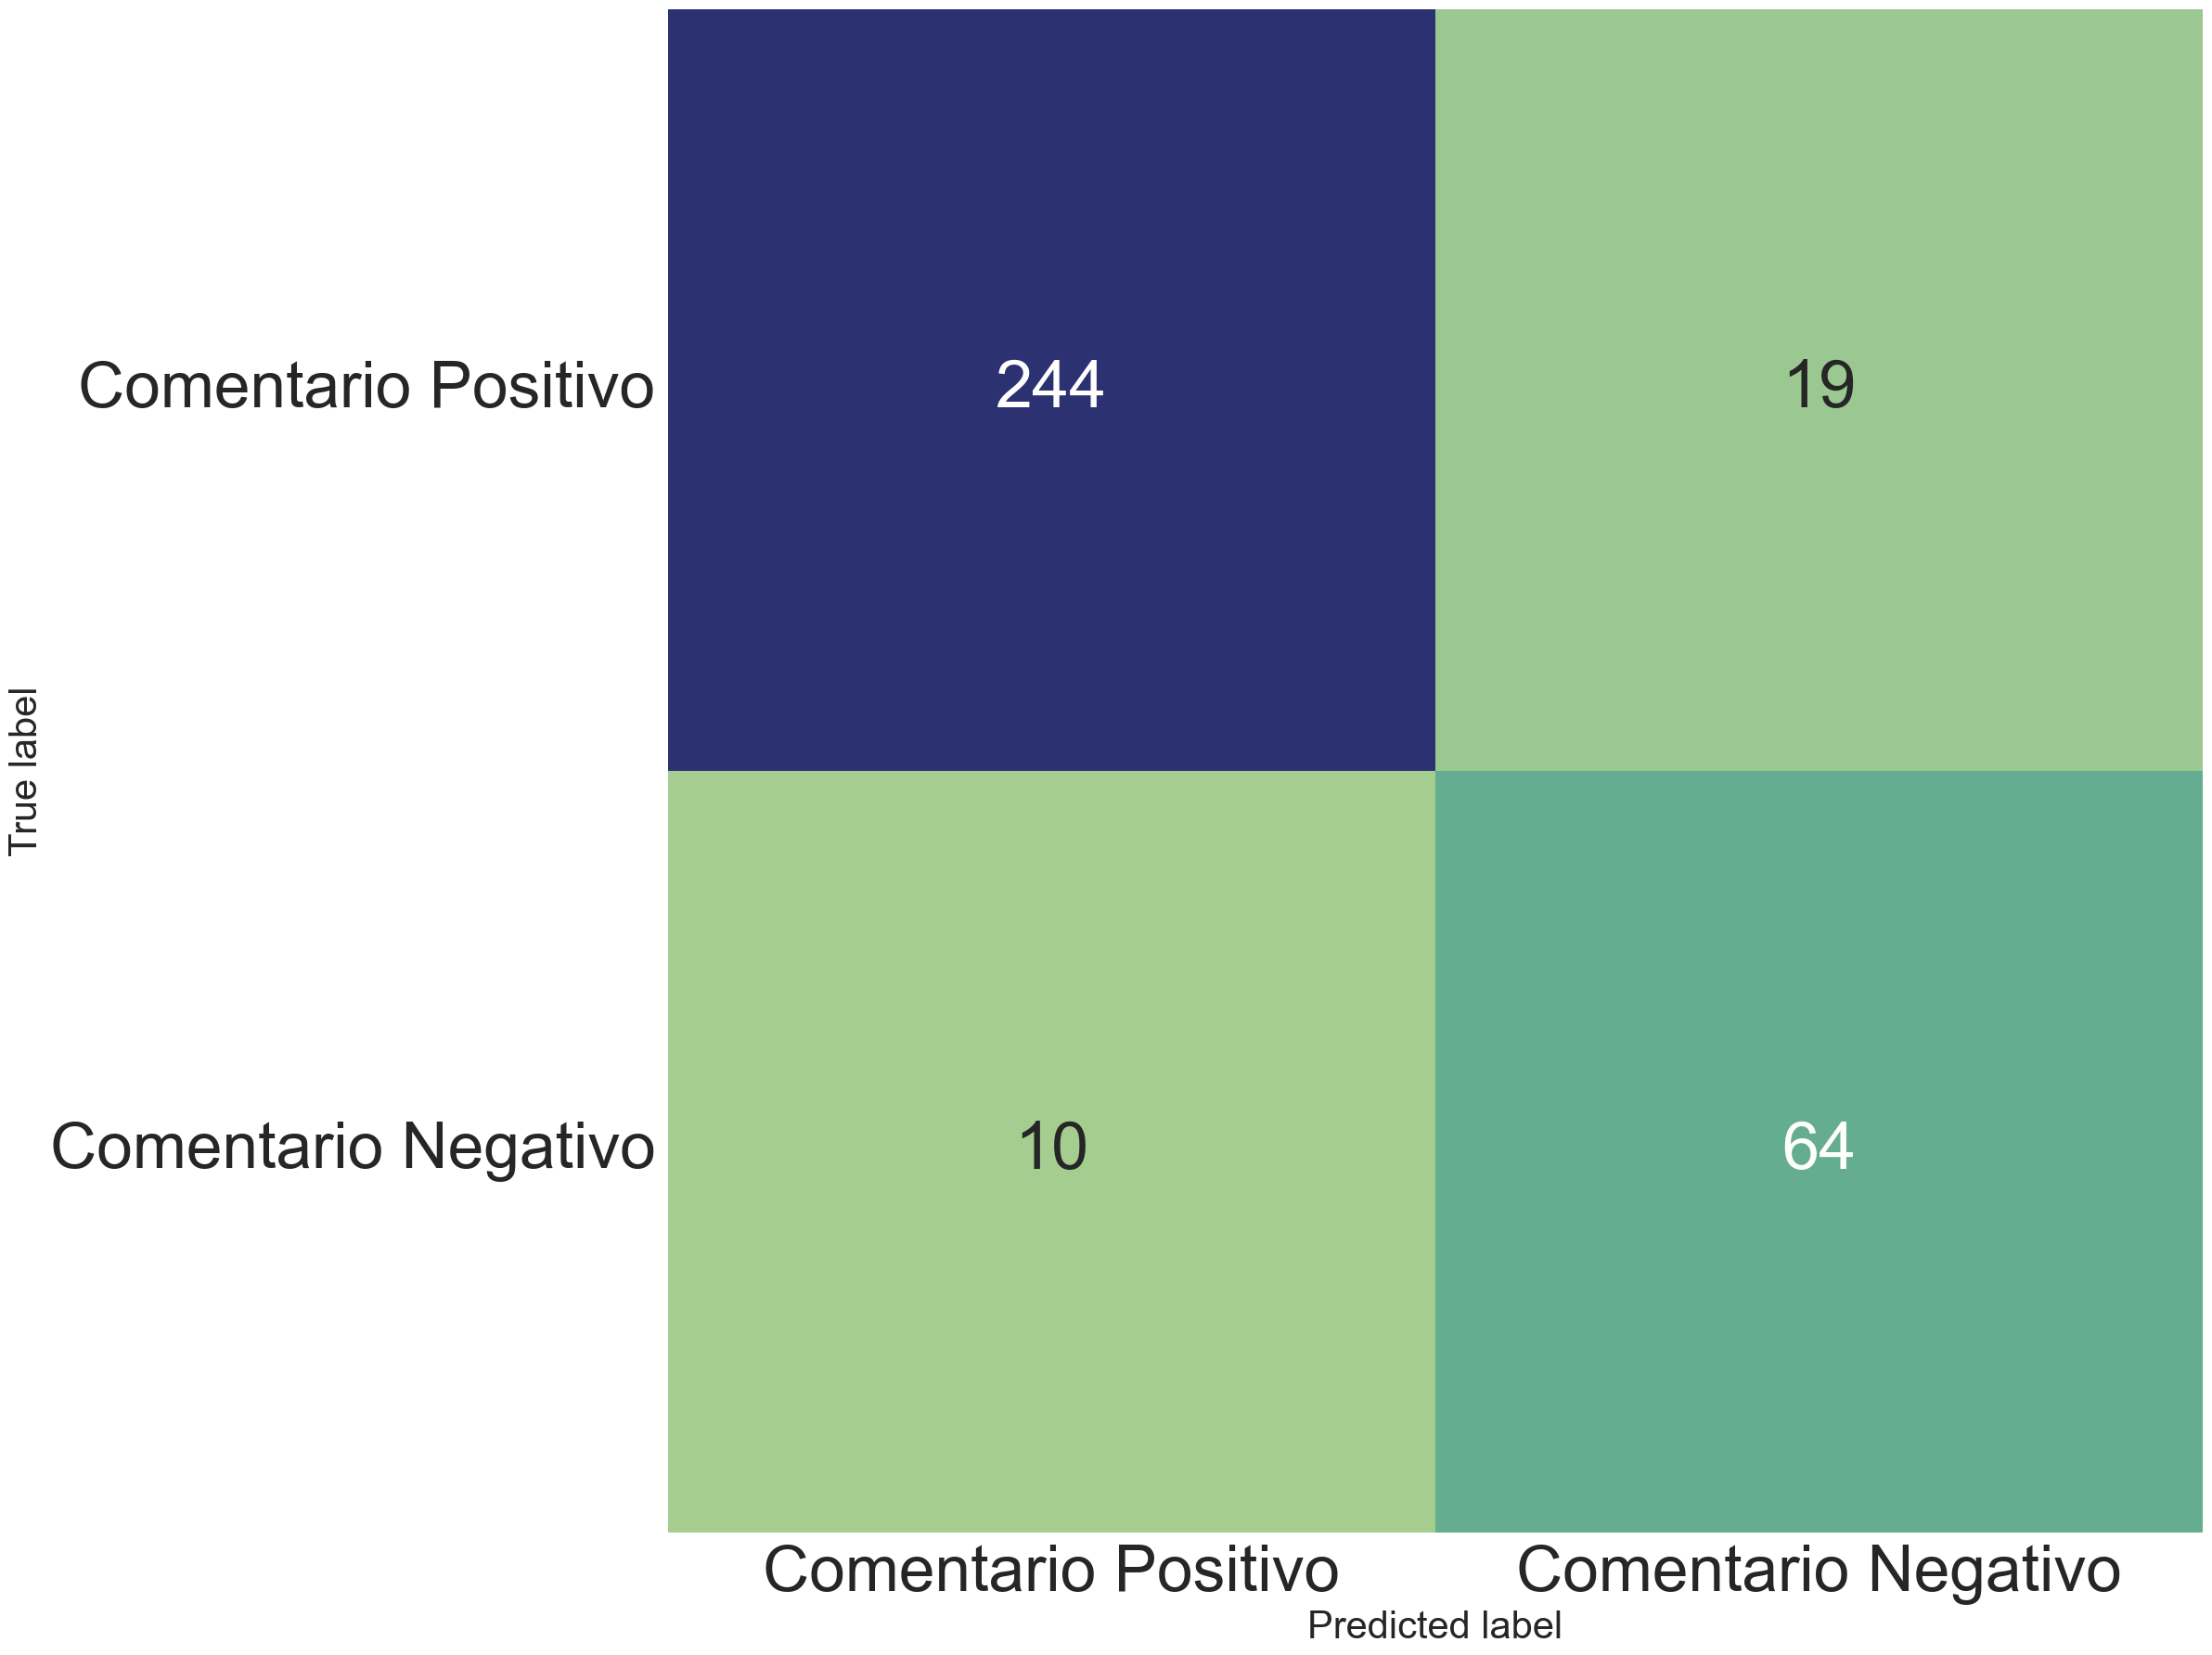

In [394]:
import ast
# ID del modelo para el que quieres extraer la matriz de confusión
model_id = 'dd90bd1e-e30f-4a57-9aa2-270a0eb504fb'

# Extraer la matriz de confusión del DataFrame usando el ID
conf_matrix_str = df_AG_FC.loc[df_AG_FC['Run_ID'] == model_id, 'eval_confusion_matrix'].values[0]
conf_matrix = ast.literal_eval(conf_matrix_str)

# Crear la matriz de confusión
cm = pd.DataFrame(conf_matrix, index=labels, columns=labels)

# Plotear la matriz de confusión
plt.figure(figsize=(24, 18))

sns.heatmap(cm, annot=True, fmt='d', cmap='crest', xticklabels=labels, 
            yticklabels=labels, annot_kws={"size": 52}, cbar=False)

plt.xlabel('Predicted label', fontsize=30)
plt.ylabel('True label', fontsize=30)
plt.xticks(rotation=0, fontsize=50)
plt.yticks(rotation=0, fontsize=50)
# plt.title('Confusion Matrix for Best Model of DL Experiments')

plt.tight_layout()

# Save the plot as a PDF file
plt.savefig("../../../IMAGES/Análisis General/DL/DL_Experiments in _Análisis General_ best_model.pdf", format='pdf')

plt.show()


## Contenido Negativo

#### Load Training Data

In [395]:
# {'Desprestigiar Víctima': 0, 'Desprestigiar Acto': 1, 'Insultos': 2, 'Desprestigiar Deportista Autora': 3}
# Define the list of labels and colors
labels = ['Desprestigiar Víctima', 'Desprestigiar Acto', 'Insultos', 'Desprestigiar Deportista Autora']
colors = ['#478CCF', '#36C2CE', '#77E4C8', '#4535C1']

In [396]:
# Load the Excel file
path = "DL2_Contenido Negativo.xlsx"
df_CNEG_SC = pd.read_excel(path, sheet_name="Sin_contexto")
df_CNEG_TC = pd.read_excel(path, sheet_name="Tweet_context")
df_CNEG_FC = pd.read_excel(path, sheet_name="Full_context")

In [397]:
# Rename columns to categorical: {'Desprestigiar Víctima': 0, 'Desprestigiar Acto': 1, 'Insultos': 2, 'Desprestigiar Deportista Autora': 3}
mapping = {'Desprestigiar Víctima': 0, 'Desprestigiar Acto': 1, 'Insultos': 2, 'Desprestigiar Deportista Autora': 3}

# Create a dictionary for renaming
rename_dict = {}
for key, value in mapping.items():
    rename_dict[f'eval_{value}_precision'] = f'eval_{key}_precision'
    rename_dict[f'eval_{value}_recall'] = f'eval_{key}_recall'
    rename_dict[f'eval_{value}_f1'] = f'eval_{key}_f1-score'
    rename_dict[f'eval_{value}_support'] = f'eval_{key}_support'

# Rename the columns
df_CNEG_SC.rename(columns=rename_dict, inplace=True)
df_CNEG_TC.rename(columns=rename_dict, inplace=True)
df_CNEG_FC.rename(columns=rename_dict, inplace=True)

In [398]:
# Añadir la nueva columna 'Context' a cada DataFrame
df_CNEG_SC['Context'] = 'Without Context'
df_CNEG_TC['Context'] = 'Tweet Context'
df_CNEG_FC['Context'] = 'Full Context'

# Concatenar los tres DataFrames
df_CNEG_join = pd.concat([df_CNEG_SC[['Model_Description', 'Total Time', 'Context', 'eval_weighted_f1', f'eval_{labels[0]}_f1-score', f'eval_{labels[1]}_f1-score', f'eval_{labels[2]}_f1-score', f'eval_{labels[3]}_f1-score', 'eval_accuracy']], 
                         df_CNEG_TC[['Model_Description', 'Total Time', 'Context', 'eval_weighted_f1', f'eval_{labels[0]}_f1-score', f'eval_{labels[1]}_f1-score', f'eval_{labels[2]}_f1-score', f'eval_{labels[3]}_f1-score', 'eval_accuracy']], 
                         df_CNEG_FC[['Model_Description', 'Total Time', 'Context', 'eval_weighted_f1', f'eval_{labels[0]}_f1-score', f'eval_{labels[1]}_f1-score', f'eval_{labels[2]}_f1-score', f'eval_{labels[3]}_f1-score', 'eval_accuracy']]])

df_CNEG_join

,Model_Description,Total Time,Context,eval_weighted_f1,eval_Desprestigiar Víctima_f1-score,eval_Desprestigiar Acto_f1-score,eval_Insultos_f1-score,eval_Desprestigiar Deportista Autora_f1-score,eval_accuracy
0,dccuchile/bert-base-spanish-wwm-cased,812.441078,Without Context,0.483229,0.411765,0.375000,0.444444,0.586207,0.478873
1,FacebookAI/xlm-roberta-base,975.134775,Without Context,0.419324,0.444444,0.363636,0.000000,0.603175,0.464789
2,pysentimiento/robertuito-base-cased,594.305115,Without Context,0.406758,0.235294,0.320000,0.125000,0.642857,0.478873
3,PlanTL-GOB-ES/roberta-large-bne,2316.032564,Without Context,0.498142,0.640000,0.160000,0.380952,0.647887,0.521127
4,bert-base-multilingual-cased,1177.713078,Without Context,0.474487,0.296296,0.222222,0.352941,0.732394,0.507042
0,PlanTL-GOB-ES/roberta-large-bne,2786.813552,Tweet Context,0.518886,0.545455,0.250000,0.454545,0.666667,0.535211
1,bert-base-multilingual-cased,1352.786863,Tweet Context,0.387794,0.240000,0.266667,0.210526,0.588235,0.408451
2,pysentimiento/robertuito-base-cased,819.124651,Tweet Context,0.460722,0.421053,0.400000,0.315789,0.567568,0.478873
3,dccuchile/bert-base-spanish-wwm-cased,989.326623,Tweet Context,0.530793,0.416667,0.470588,0.375000,0.676471,0.549296
4,FacebookAI/xlm-roberta-base,1249.269134,Tweet Context,0.251011,0.000000,0.000000,0.000000,0.594059,0.422535


#### F1 Score

In [399]:
# Filter to include only numeric columns
numeric_cols = ['eval_weighted_f1', f'eval_{labels[0]}_f1-score', f'eval_{labels[1]}_f1-score', f'eval_{labels[2]}_f1-score', f'eval_{labels[3]}_f1-score', 'eval_accuracy', 'Total Time']

# Group the data by 'Context' and calculate the mean for numeric columns
context_grouped_CNEG = df_CNEG_join.groupby('Context')[numeric_cols].max().reset_index()

# Reorder the contexts
context_grouped_CNEG['Context'] = pd.Categorical(context_grouped_CNEG['Context'], categories=['Without Context', 'Tweet Context', 'Full Context'], ordered=True)

context_grouped_CNEG

,Context,eval_weighted_f1,eval_Desprestigiar Víctima_f1-score,eval_Desprestigiar Acto_f1-score,eval_Insultos_f1-score,eval_Desprestigiar Deportista Autora_f1-score,eval_accuracy,Total Time
0,Full Context,0.442235,0.705882,0.303030,0.333333,0.710526,0.492958,7100.714372
1,Tweet Context,0.530793,0.545455,0.470588,0.454545,0.676471,0.549296,2786.813552
2,Without Context,0.498142,0.640000,0.375000,0.444444,0.732394,0.521127,2316.032564


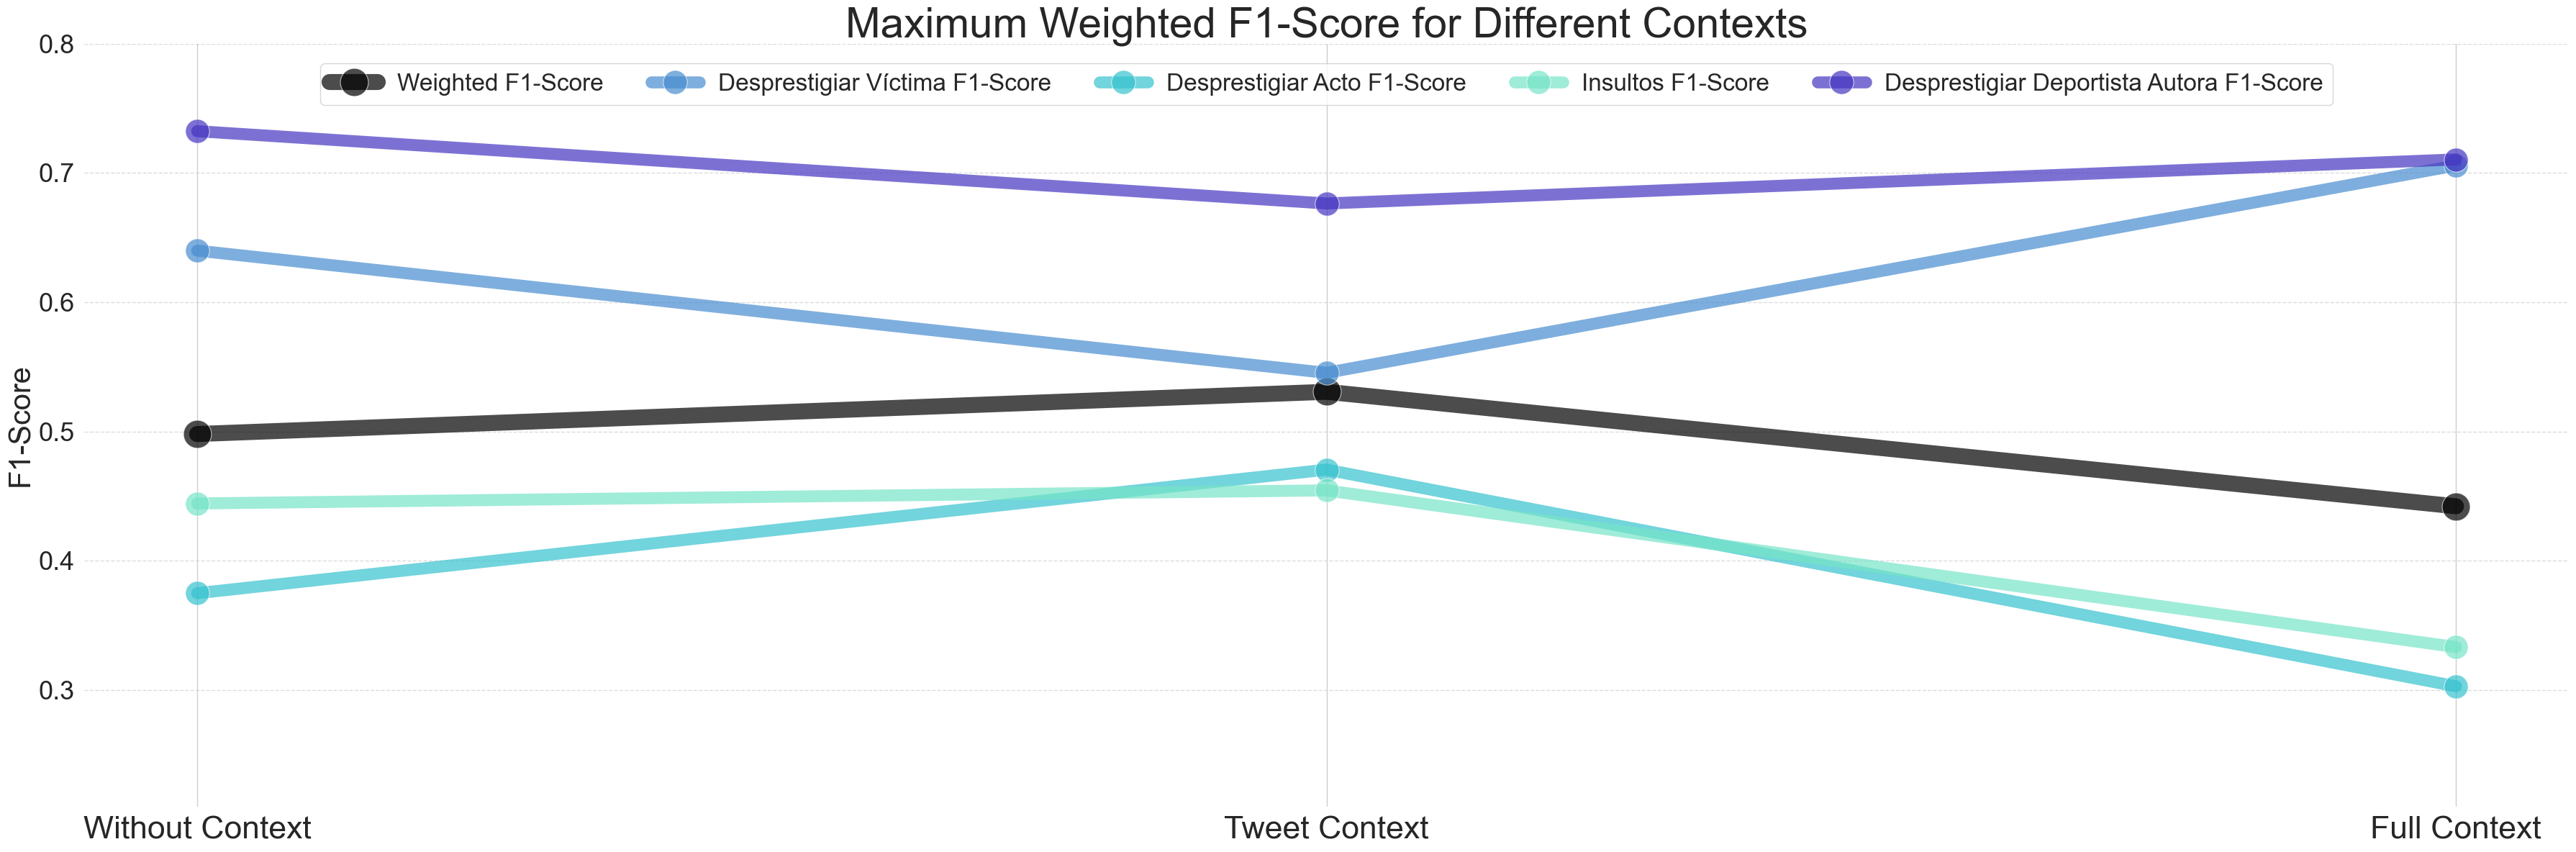

In [400]:
# Set Seaborn style
sns.set(style="whitegrid")

# Calculate the upper limit for the y-axis dynamically
y_max = 1.05

# Create a figure with subplots using GridSpec
fig = plt.figure(figsize=(36, 12))
gs = GridSpec(1, 1, figure=fig)

# Plot
ax1 = fig.add_subplot(gs[0, 0])

# Plot lines
sns.lineplot(ax=ax1, x='Context', y='eval_weighted_f1', data=context_grouped_CNEG, marker='o', linewidth=16, markersize=28, alpha=0.7, color="black", label="Weighted F1-Score")
for i,label in enumerate(labels):
    sns.lineplot(ax=ax1, x='Context', y=f'eval_{label}_f1-score', data=context_grouped_CNEG, marker='o', linewidth=12, markersize=24, alpha=0.7, color=colors[i], label=f"{label} F1-Score")

ax1.set_title('Maximum Weighted F1-Score for Different Contexts', fontsize=42)
ax1.set_xlabel('', fontsize=24)
ax1.set_ylabel('F1-Score', fontsize=30)
ax1.tick_params(axis='x', labelsize=32)
ax1.tick_params(axis='y', labelsize=26)
ax1.set_ylim(0.21, 0.8)

# Move legend to the top
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 0.99), ncol=5, fontsize=24)

# Add a grid to improve readability
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Remove spines for a clean look
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)

# Show the plot
plt.tight_layout()

# Save the plot as a PDF file
plt.savefig("../../../IMAGES/Contenido Negativo/DL/DL_Experiments in _ContenidoNegativo_ weightedF1_max.pdf", format='pdf')

plt.show()

C:\Users\jorge\AppData\Local\Temp\ipykernel_36740\236864652.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(ax=ax1, x='Context', y='eval_weighted_f1', hue='Model_Description', data=df_CNEG_join, palette='Blues', alpha=0.7, ci=None)


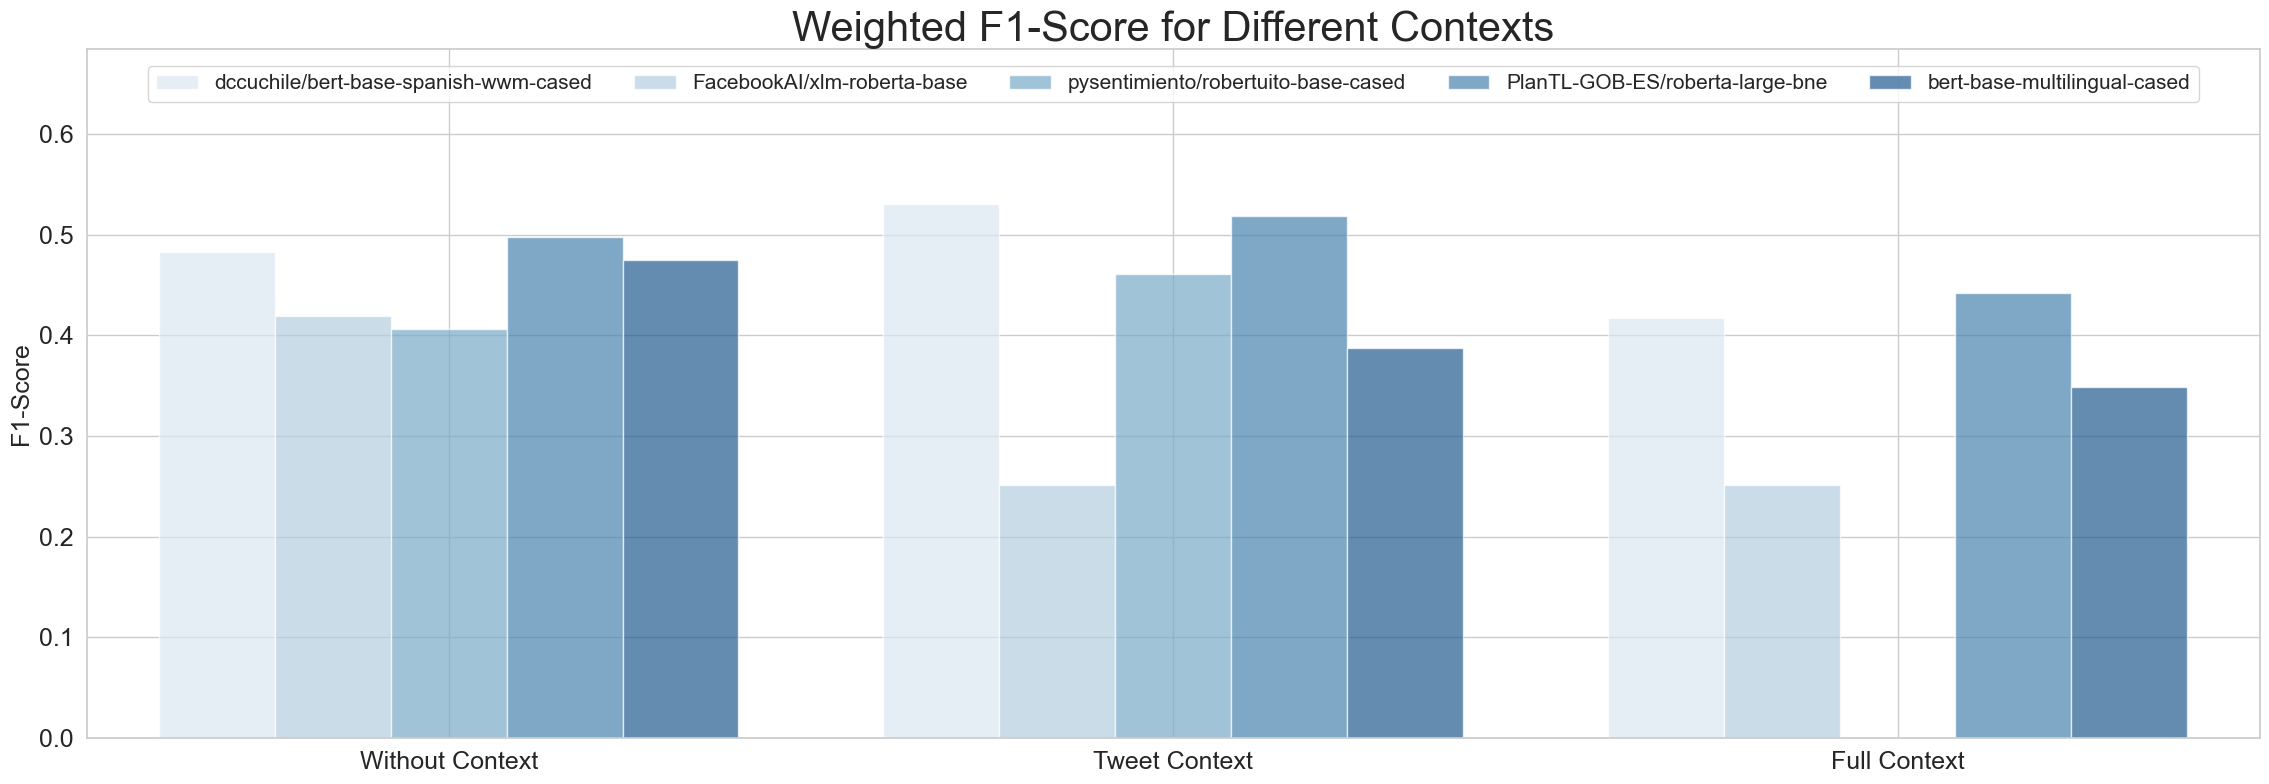

In [401]:
# Set Seaborn style
sns.set(style="whitegrid")

# Calculate the upper limit for the y-axis dynamically
y_max = df_CNEG_join['eval_weighted_f1'].mean() + 3 * df_CNEG_join['eval_weighted_f1'].std()

# Create a figure with subplots using GridSpec
fig = plt.figure(figsize=(24, 8))
gs = GridSpec(1, 1, figure=fig)

# Plot for MODELS
ax1 = fig.add_subplot(gs[0, 0])
sns.barplot(ax=ax1, x='Context', y='eval_weighted_f1', hue='Model_Description', data=df_CNEG_join, palette='Blues', alpha=0.7, ci=None)
ax1.set_title('Weighted F1-Score for Different Contexts', fontsize=30)
ax1.set_xlabel('', fontsize=18)
ax1.set_ylabel('F1-Score', fontsize=18)
ax1.tick_params(axis='x', labelsize=18)
ax1.tick_params(axis='y', labelsize=18)
ax1.set_ylim(0, y_max)

# Remove grid
ax1.grid(False)

# Move legend to the top
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 0.99), ncol=5, fontsize=15)

# Adding grid for better readability
ax1.grid(True)

# Show the plot
plt.tight_layout()
plt.show()



#### Performance (Time)

C:\Users\jorge\AppData\Local\Temp\ipykernel_36740\1860592358.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(ax=ax1, x='Context', y='Total Time', hue='Model_Description', data=df_CNEG_join, palette='Blues', alpha=0.7, ci=None)


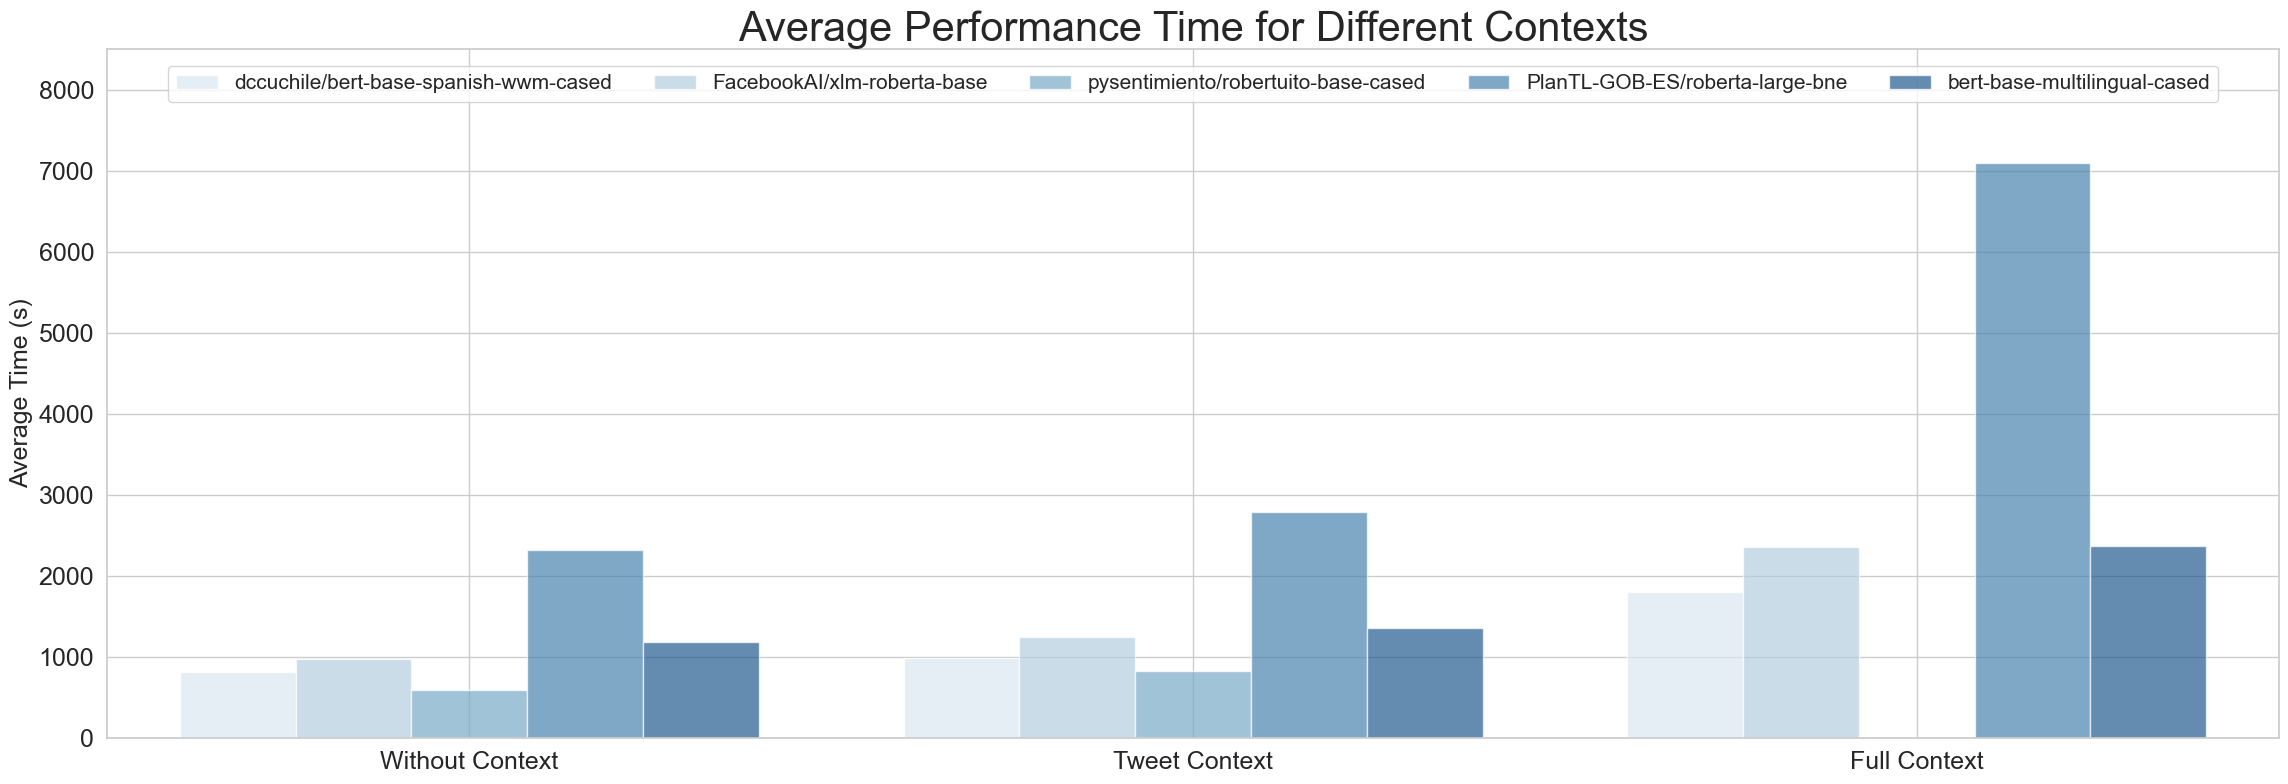

In [402]:
# Set Seaborn style
sns.set(style="whitegrid")

# Calculate the upper limit for the y-axis dynamically
y_max = df_CNEG_join['Total Time'].mean() + 4 * df_CNEG_join['Total Time'].std()

# Create a figure with subplots using GridSpec
fig = plt.figure(figsize=(24, 8))
gs = GridSpec(1, 1, figure=fig)

# Plot for MODELS
ax1 = fig.add_subplot(gs[0, 0])
sns.barplot(ax=ax1, x='Context', y='Total Time', hue='Model_Description', data=df_CNEG_join, palette='Blues', alpha=0.7, ci=None)
ax1.set_title('Average Performance Time for Different Contexts', fontsize=30)
ax1.set_xlabel('', fontsize=18)
ax1.set_ylabel('Average Time (s)', fontsize=18)
ax1.tick_params(axis='x', labelsize=18)
ax1.tick_params(axis='y', labelsize=18)
ax1.set_ylim(0, y_max)

# Move legend to the top
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 0.99), ncol=5, fontsize=15)


# Adding grid for better readability
ax1.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

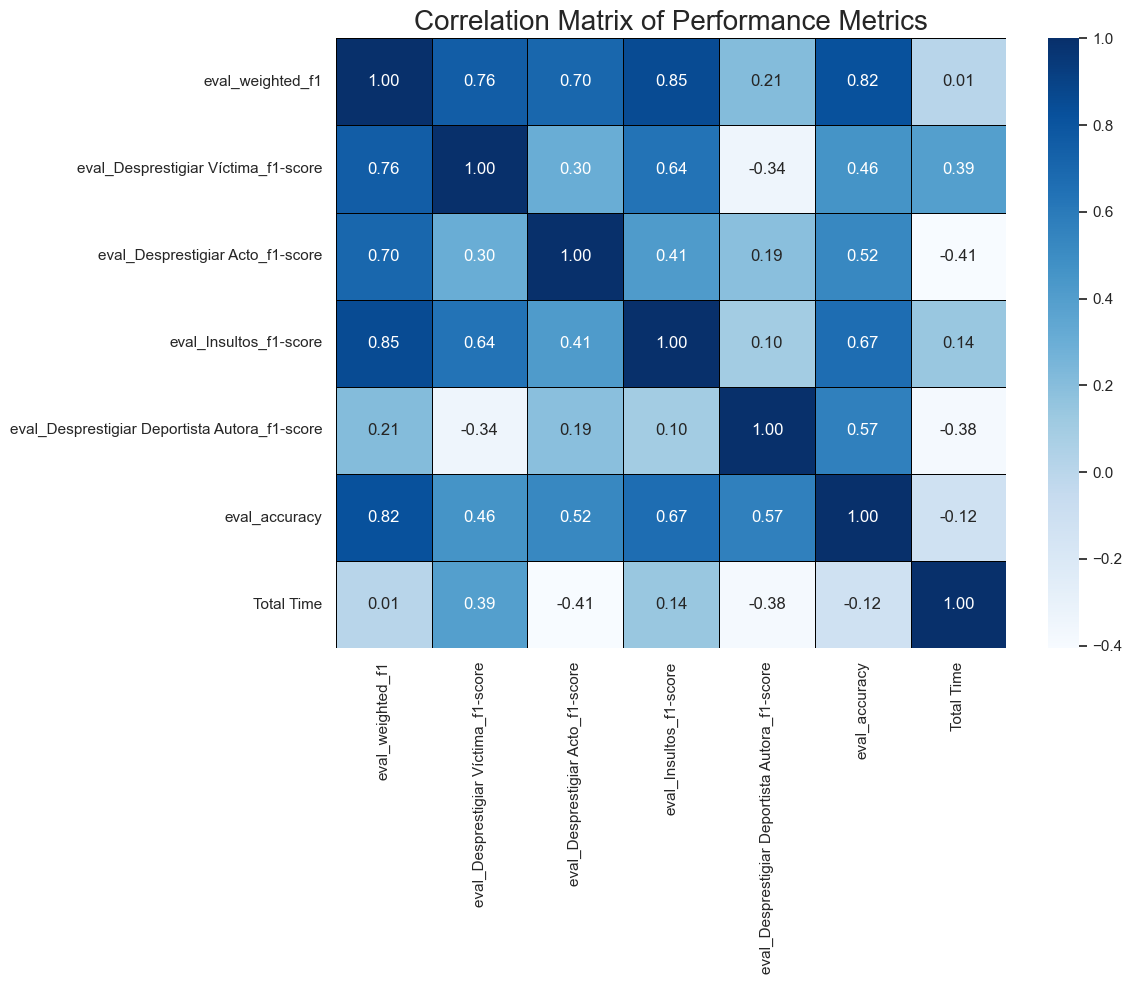

In [403]:
# Calculate the correlation matrix
correlation_matrix = df_CNEG_join[['eval_weighted_f1', f'eval_{labels[0]}_f1-score', f'eval_{labels[1]}_f1-score', f'eval_{labels[2]}_f1-score', f'eval_{labels[3]}_f1-score', 'eval_accuracy', 'Total Time']].corr()

# Set Seaborn style
sns.set(style="whitegrid")

# Create a heatmap for the correlation matrix
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5, linecolor='black')

# Set title and labels
plt.title('Correlation Matrix of Performance Metrics', fontsize=20)
plt.yticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()


#### Confussion Matrix - Best Model

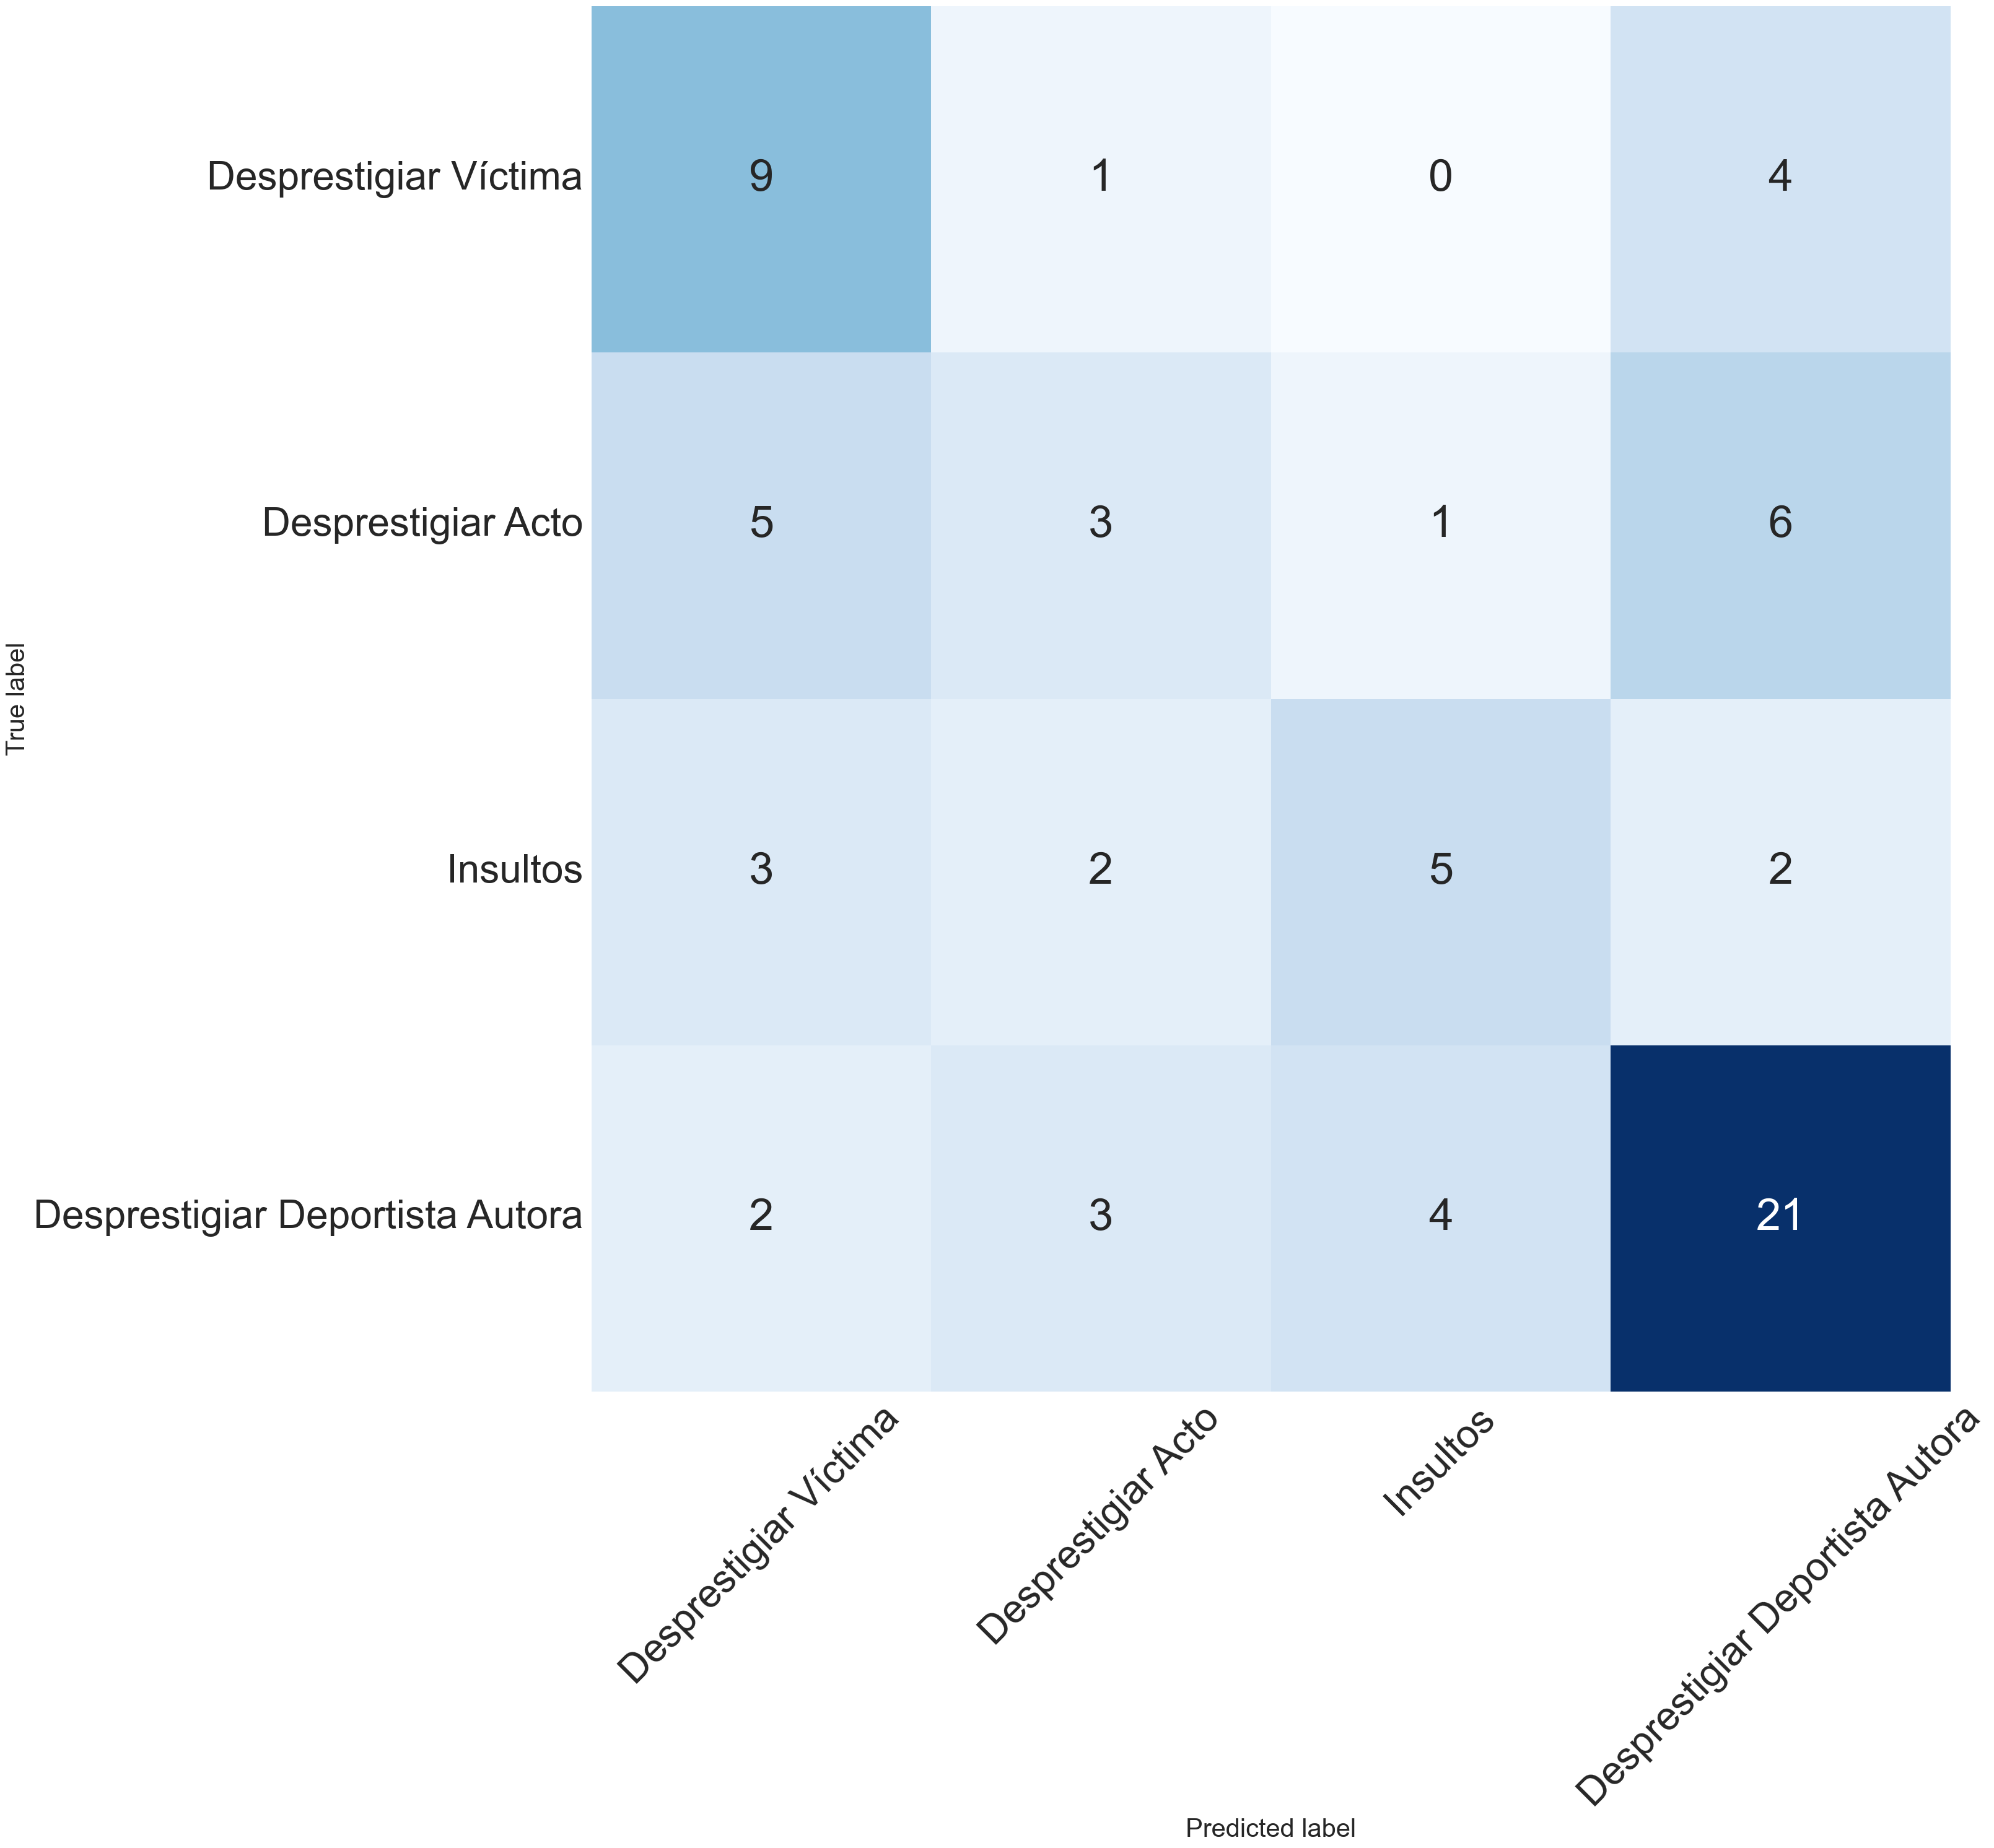

In [404]:
import ast
# ID del modelo para el que quieres extraer la matriz de confusión
model_id = 'cebd252f-4519-4d39-9435-2e73069b6baa'

# Extraer la matriz de confusión del DataFrame usando el ID
conf_matrix_str = df_CNEG_TC.loc[df_CNEG_TC['Run_ID'] == model_id, 'eval_confusion_matrix'].values[0]
conf_matrix = ast.literal_eval(conf_matrix_str)

# Crear la matriz de confusión
cm = pd.DataFrame(conf_matrix, index=labels, columns=labels)

# Plotear la matriz de confusión
plt.figure(figsize=(32, 30))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, 
            yticklabels=labels, annot_kws={"size": 52}, cbar=False)

plt.xlabel('Predicted label', fontsize=30)
plt.ylabel('True label', fontsize=30)
plt.xticks(rotation=45, fontsize=46)
plt.yticks(rotation=0, fontsize=46)
# plt.title('Confusion Matrix for Best Model of ML Experiments')

plt.tight_layout()

# Save the plot as a PDF file
plt.savefig("../../../IMAGES/Contenido Negativo/DL/DL_Experiments in _ContenidoNegativo_ best_model.pdf", format='pdf')

plt.show()

## Insultos

#### Load Training Data

In [405]:
# {'Sexistas/misóginos': 0, 'Genéricos': 1, 'Deseo de Dañar': 2}
# Define the list of labels and colors
labels = ['Sexistas/misóginos', 'Genéricos', 'Deseo de Dañar']
colors = ['#FFAF45', '#FB6D48', '#D74B76']

In [406]:
# Load the Excel file
path = "DL2_Insultos.xlsx"
df_INS_SC = pd.read_excel(path, sheet_name="Sin_contexto")
df_INS_TC = pd.read_excel(path, sheet_name="Tweet_context")
df_INS_FC = pd.read_excel(path, sheet_name="Full_context")

In [407]:
# Rename columns to categorical: {'Sexistas/misóginos': 0, 'Genéricos': 1, 'Deseo de Dañar': 2}
mapping = {'Sexistas/misóginos': 0, 'Genéricos': 1, 'Deseo de Dañar': 2}

# Create a dictionary for renaming
rename_dict = {}
for key, value in mapping.items():
    rename_dict[f'eval_{value}_precision'] = f'eval_{key}_precision'
    rename_dict[f'eval_{value}_recall'] = f'eval_{key}_recall'
    rename_dict[f'eval_{value}_f1'] = f'eval_{key}_f1-score'
    rename_dict[f'eval_{value}_support'] = f'eval_{key}_support'

# Rename the columns
df_INS_SC.rename(columns=rename_dict, inplace=True)
df_INS_TC.rename(columns=rename_dict, inplace=True)
df_INS_FC.rename(columns=rename_dict, inplace=True)

In [408]:
# Añadir la nueva columna 'Context' a cada DataFrame
df_INS_SC['Context'] = 'Without Context'
df_INS_TC['Context'] = 'Tweet Context'
df_INS_FC['Context'] = 'Full Context'

# Concatenar los tres DataFrames
df_INS_join = pd.concat([df_INS_SC[['Model_Description', 'Total Time', 'Context', 'eval_weighted_f1', f'eval_{labels[0]}_f1-score', f'eval_{labels[1]}_f1-score', f'eval_{labels[2]}_f1-score', 'eval_accuracy']], 
                         df_INS_TC[['Model_Description', 'Total Time', 'Context', 'eval_weighted_f1', f'eval_{labels[0]}_f1-score', f'eval_{labels[1]}_f1-score', f'eval_{labels[2]}_f1-score', 'eval_accuracy']], 
                         df_INS_FC[['Model_Description', 'Total Time', 'Context', 'eval_weighted_f1', f'eval_{labels[0]}_f1-score', f'eval_{labels[1]}_f1-score', f'eval_{labels[2]}_f1-score', 'eval_accuracy']]])

df_INS_join

,Model_Description,Total Time,Context,eval_weighted_f1,eval_Sexistas/misóginos_f1-score,eval_Genéricos_f1-score,eval_Deseo de Dañar_f1-score,eval_accuracy
0,dccuchile/bert-base-spanish-wwm-cased,488.320846,Without Context,0.515938,0.375000,0.619048,0.461538,0.523810
1,bert-base-multilingual-cased,633.267832,Without Context,0.312256,0.000000,0.655738,0.000000,0.476190
2,FacebookAI/xlm-roberta-base,559.035278,Without Context,0.307220,0.000000,0.645161,0.000000,0.476190
3,pysentimiento/robertuito-base-cased,356.198124,Without Context,0.342404,0.000000,0.633333,0.142857,0.476190
4,PlanTL-GOB-ES/roberta-large-bne,1380.927838,Without Context,0.329460,0.000000,0.473684,0.363636,0.357143
0,pysentimiento/robertuito-base-cased,792.250221,Tweet Context,0.307220,0.000000,0.645161,0.000000,0.476190
1,dccuchile/bert-base-spanish-wwm-cased,588.537339,Tweet Context,0.405762,0.166667,0.612245,0.260870,0.452381
2,PlanTL-GOB-ES/roberta-large-bne,1624.768719,Tweet Context,0.440871,0.181818,0.577778,0.428571,0.476190
3,bert-base-multilingual-cased,784.664439,Tweet Context,0.338857,0.181818,0.620690,0.000000,0.452381
4,FacebookAI/xlm-roberta-base,740.488852,Tweet Context,0.307220,0.000000,0.645161,0.000000,0.476190


#### F1 Score

In [409]:
# Filter to include only numeric columns
numeric_cols = ['eval_weighted_f1', f'eval_{labels[0]}_f1-score', f'eval_{labels[1]}_f1-score', f'eval_{labels[2]}_f1-score', 'eval_accuracy', 'Total Time']

# Group the data by 'Context' and calculate the mean for numeric columns
context_grouped_INS = df_INS_join.groupby('Context')[numeric_cols].max().reset_index()

# Reorder the contexts
context_grouped_INS['Context'] = pd.Categorical(context_grouped_INS['Context'], categories=['Without Context', 'Tweet Context', 'Full Context'], ordered=True)

context_grouped_INS

,Context,eval_weighted_f1,eval_Sexistas/misóginos_f1-score,eval_Genéricos_f1-score,eval_Deseo de Dañar_f1-score,eval_accuracy,Total Time
0,Full Context,0.411840,0.166667,0.645161,0.540541,0.47619,4062.746907
1,Tweet Context,0.440871,0.181818,0.645161,0.428571,0.47619,1624.768719
2,Without Context,0.515938,0.375000,0.655738,0.461538,0.52381,1380.927838


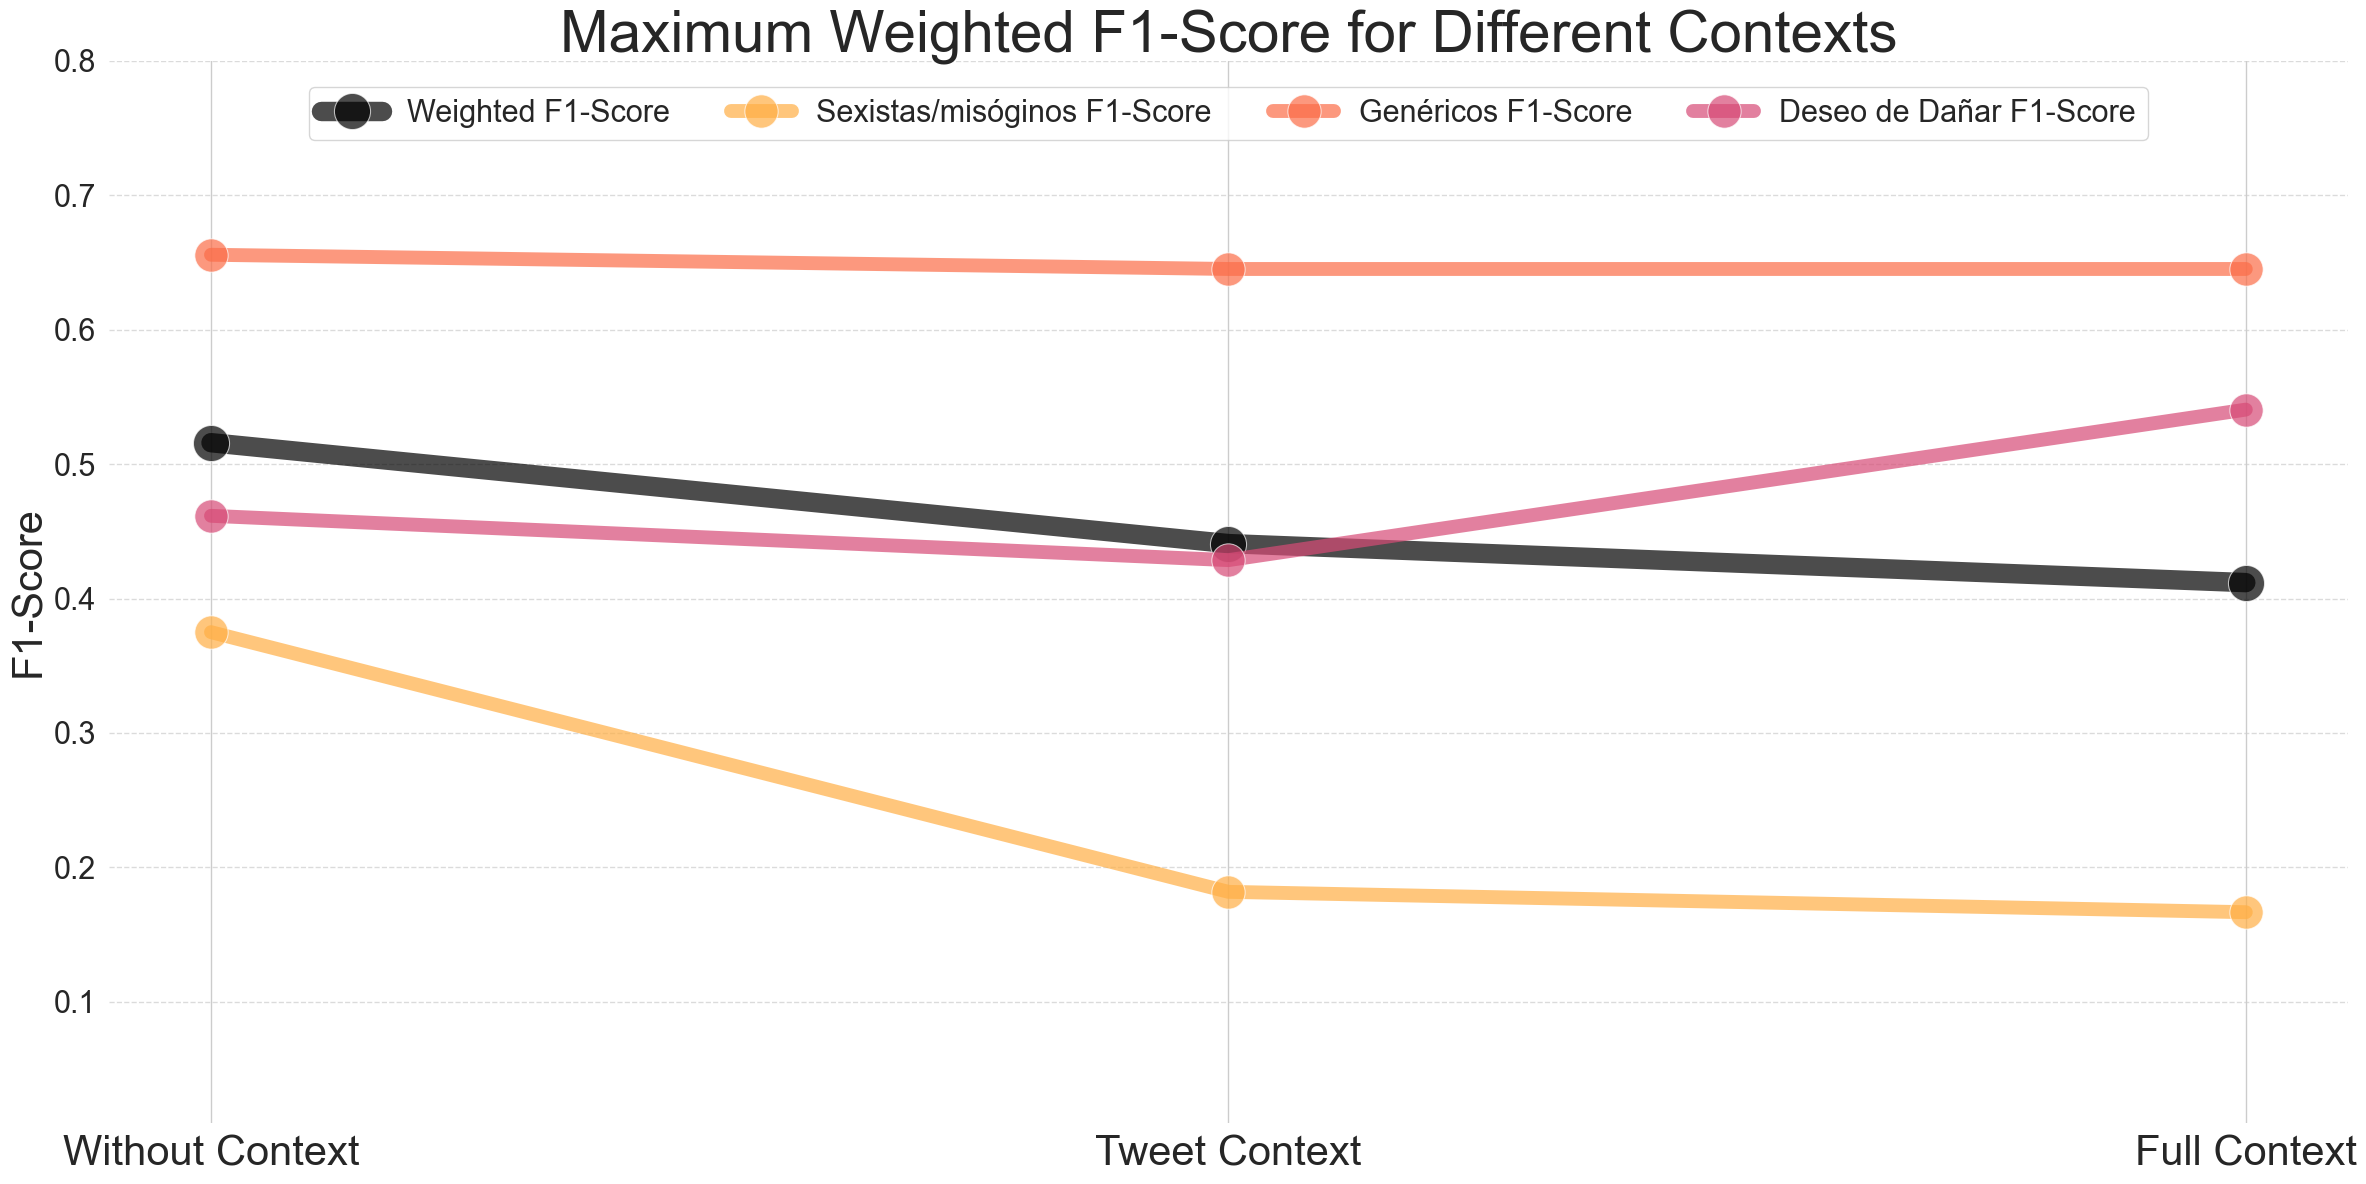

In [411]:
# Set Seaborn style
sns.set(style="whitegrid")

# Calculate the upper limit for the y-axis dynamically
y_max = 1.05

# Create a figure with subplots using GridSpec
fig = plt.figure(figsize=(24, 12))
gs = GridSpec(1, 1, figure=fig)

# Plot
ax1 = fig.add_subplot(gs[0, 0])

# Plot lines
sns.lineplot(ax=ax1, x='Context', y='eval_weighted_f1', data=context_grouped_INS, marker='o', linewidth=14, markersize=26, alpha=0.7, color="black", label="Weighted F1-Score")
for i, label in enumerate(labels):
    sns.lineplot(ax=ax1, x='Context', y=f'eval_{label}_f1-score', data=context_grouped_INS, marker='o', linewidth=10, markersize=24, alpha=0.7, color=colors[i], label=f"{label} F1-Score")

ax1.set_title('Maximum Weighted F1-Score for Different Contexts', fontsize=42)
ax1.set_xlabel('', fontsize=18)
ax1.set_ylabel('F1-Score', fontsize=30)
ax1.tick_params(axis='x', labelsize=30)
ax1.tick_params(axis='y', labelsize=22)
ax1.set_ylim(0.01, 0.8)

# Move legend to the top
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 0.99), ncol=4, fontsize=22)

# Add a grid to improve readability
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Remove spines for a clean look
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)

# Show the plot
plt.tight_layout()

# Save the plot as a PDF file
plt.savefig("../../../IMAGES/Insultos/DL/DL_Experiments in _Insultos_ weightedF1_max.pdf", format='pdf')

plt.show()

C:\Users\jorge\AppData\Local\Temp\ipykernel_36740\2266189374.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(ax=ax1, x='Context', y='eval_weighted_f1', hue='Model_Description', data=df_INS_join, palette='flare', alpha=0.7, ci=None)


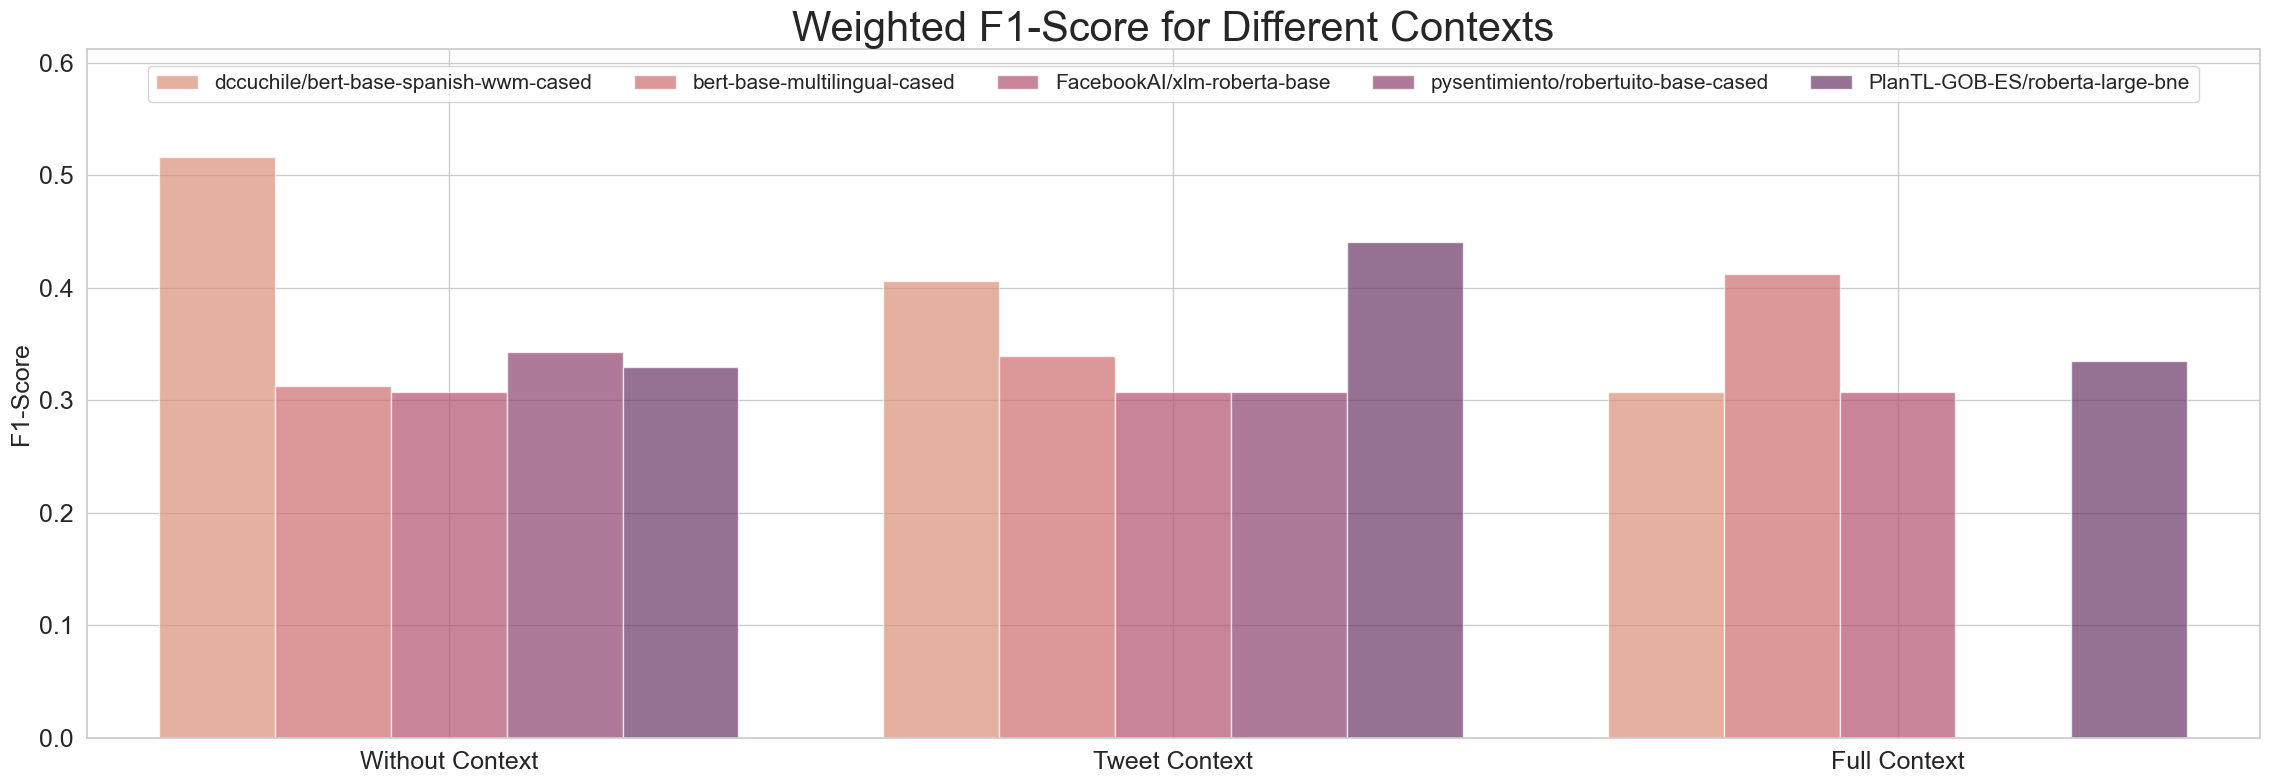

In [333]:
# Set Seaborn style
sns.set(style="whitegrid")

# Calculate the upper limit for the y-axis dynamically
y_max = df_INS_join['eval_weighted_f1'].mean() + 4 * df_INS_join['eval_weighted_f1'].std()

# Create a figure with subplots using GridSpec
fig = plt.figure(figsize=(24, 8))
gs = GridSpec(1, 1, figure=fig)

# Plot for MODELS
ax1 = fig.add_subplot(gs[0, 0])
sns.barplot(ax=ax1, x='Context', y='eval_weighted_f1', hue='Model_Description', data=df_INS_join, palette='flare', alpha=0.7, ci=None)
ax1.set_title('Weighted F1-Score for Different Contexts', fontsize=30)
ax1.set_xlabel('', fontsize=18)
ax1.set_ylabel('F1-Score', fontsize=18)
ax1.tick_params(axis='x', labelsize=18)
ax1.tick_params(axis='y', labelsize=18)
ax1.set_ylim(0, y_max)

# Remove grid
ax1.grid(False)

# Move legend to the top
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 0.99), ncol=5, fontsize=15)

# Adding grid for better readability
ax1.grid(True)

# Show the plot
plt.tight_layout()
plt.show()



#### Performance (Time)

C:\Users\jorge\AppData\Local\Temp\ipykernel_36740\2311273754.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(ax=ax1, x='Context', y='Total Time', hue='Model_Description', data=df_INS_join, palette='flare', alpha=0.7, ci=None)


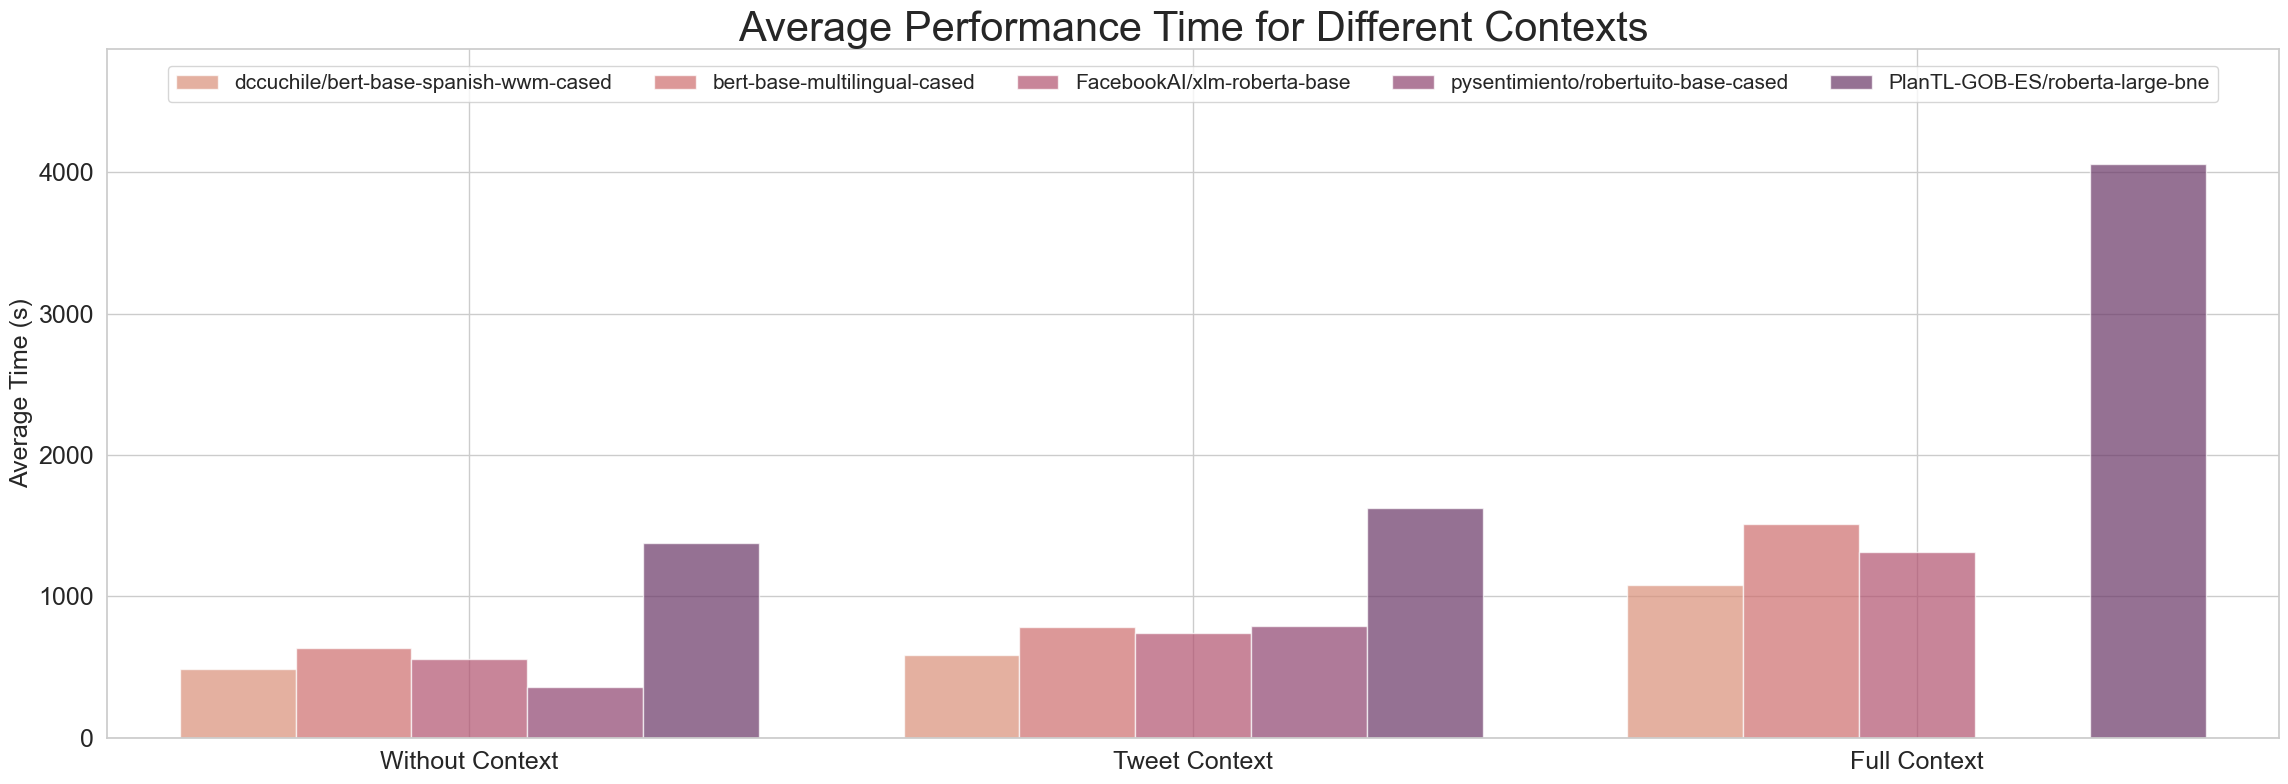

In [334]:
# Set Seaborn style
sns.set(style="whitegrid")

# Calculate the upper limit for the y-axis dynamically
y_max = df_INS_join['Total Time'].mean() + 4 * df_INS_join['Total Time'].std()

# Create a figure with subplots using GridSpec
fig = plt.figure(figsize=(24, 8))
gs = GridSpec(1, 1, figure=fig)

# Plot for MODELS
ax1 = fig.add_subplot(gs[0, 0])
sns.barplot(ax=ax1, x='Context', y='Total Time', hue='Model_Description', data=df_INS_join, palette='flare', alpha=0.7, ci=None)
ax1.set_title('Average Performance Time for Different Contexts', fontsize=30)
ax1.set_xlabel('', fontsize=18)
ax1.set_ylabel('Average Time (s)', fontsize=18)
ax1.tick_params(axis='x', labelsize=18)
ax1.tick_params(axis='y', labelsize=18)
ax1.set_ylim(0, y_max)

# Move legend to the top
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 0.99), ncol=5, fontsize=15)


# Adding grid for better readability
ax1.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

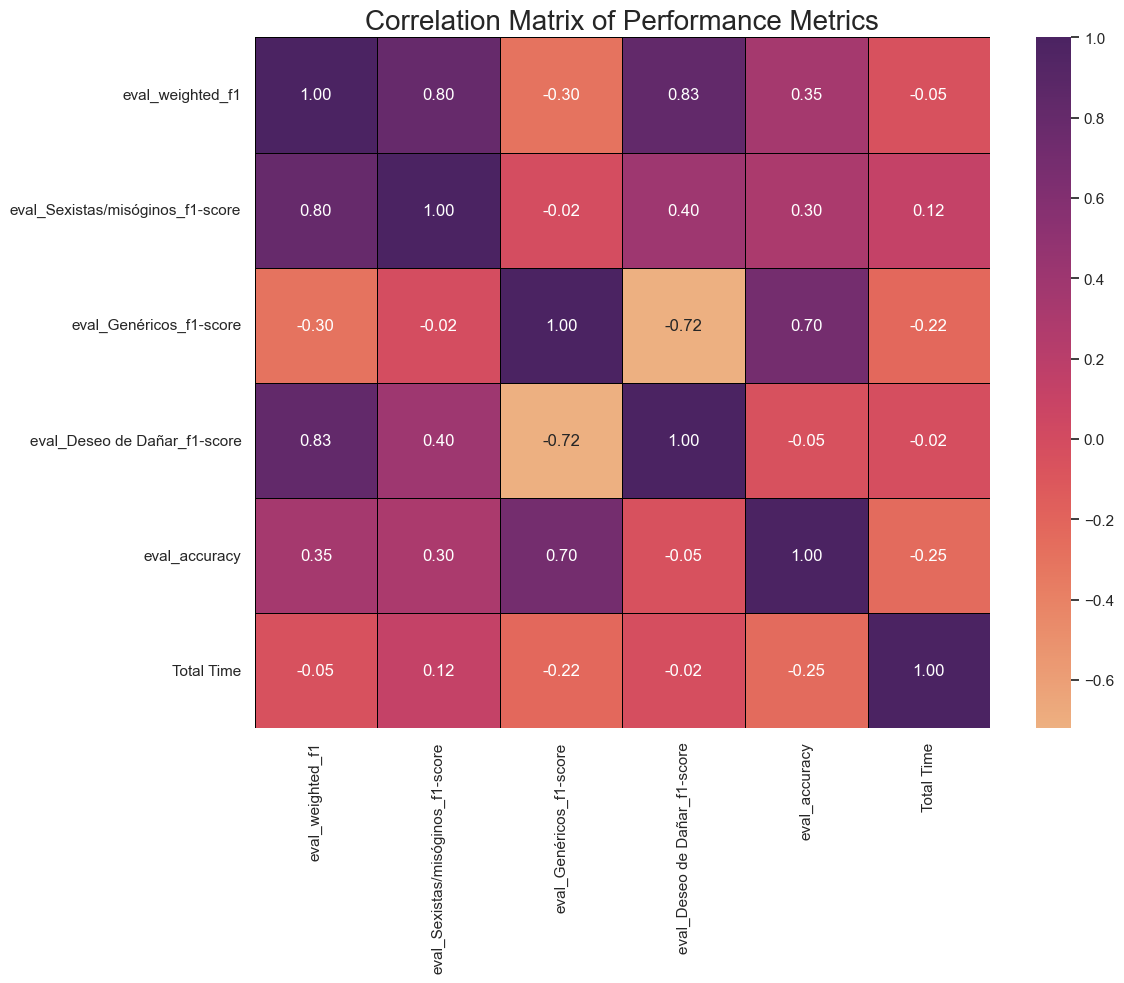

In [335]:
# Calculate the correlation matrix
correlation_matrix = df_INS_join[['eval_weighted_f1', f'eval_{labels[0]}_f1-score', f'eval_{labels[1]}_f1-score', f'eval_{labels[2]}_f1-score', 'eval_accuracy', 'Total Time']].corr()

# Set Seaborn style
sns.set(style="whitegrid")

# Create a heatmap for the correlation matrix
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='flare', fmt='.2f', linewidths=0.5, linecolor='black')

# Set title and labels
plt.title('Correlation Matrix of Performance Metrics', fontsize=20)
plt.yticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()


#### Confussion Matrix - Best Model

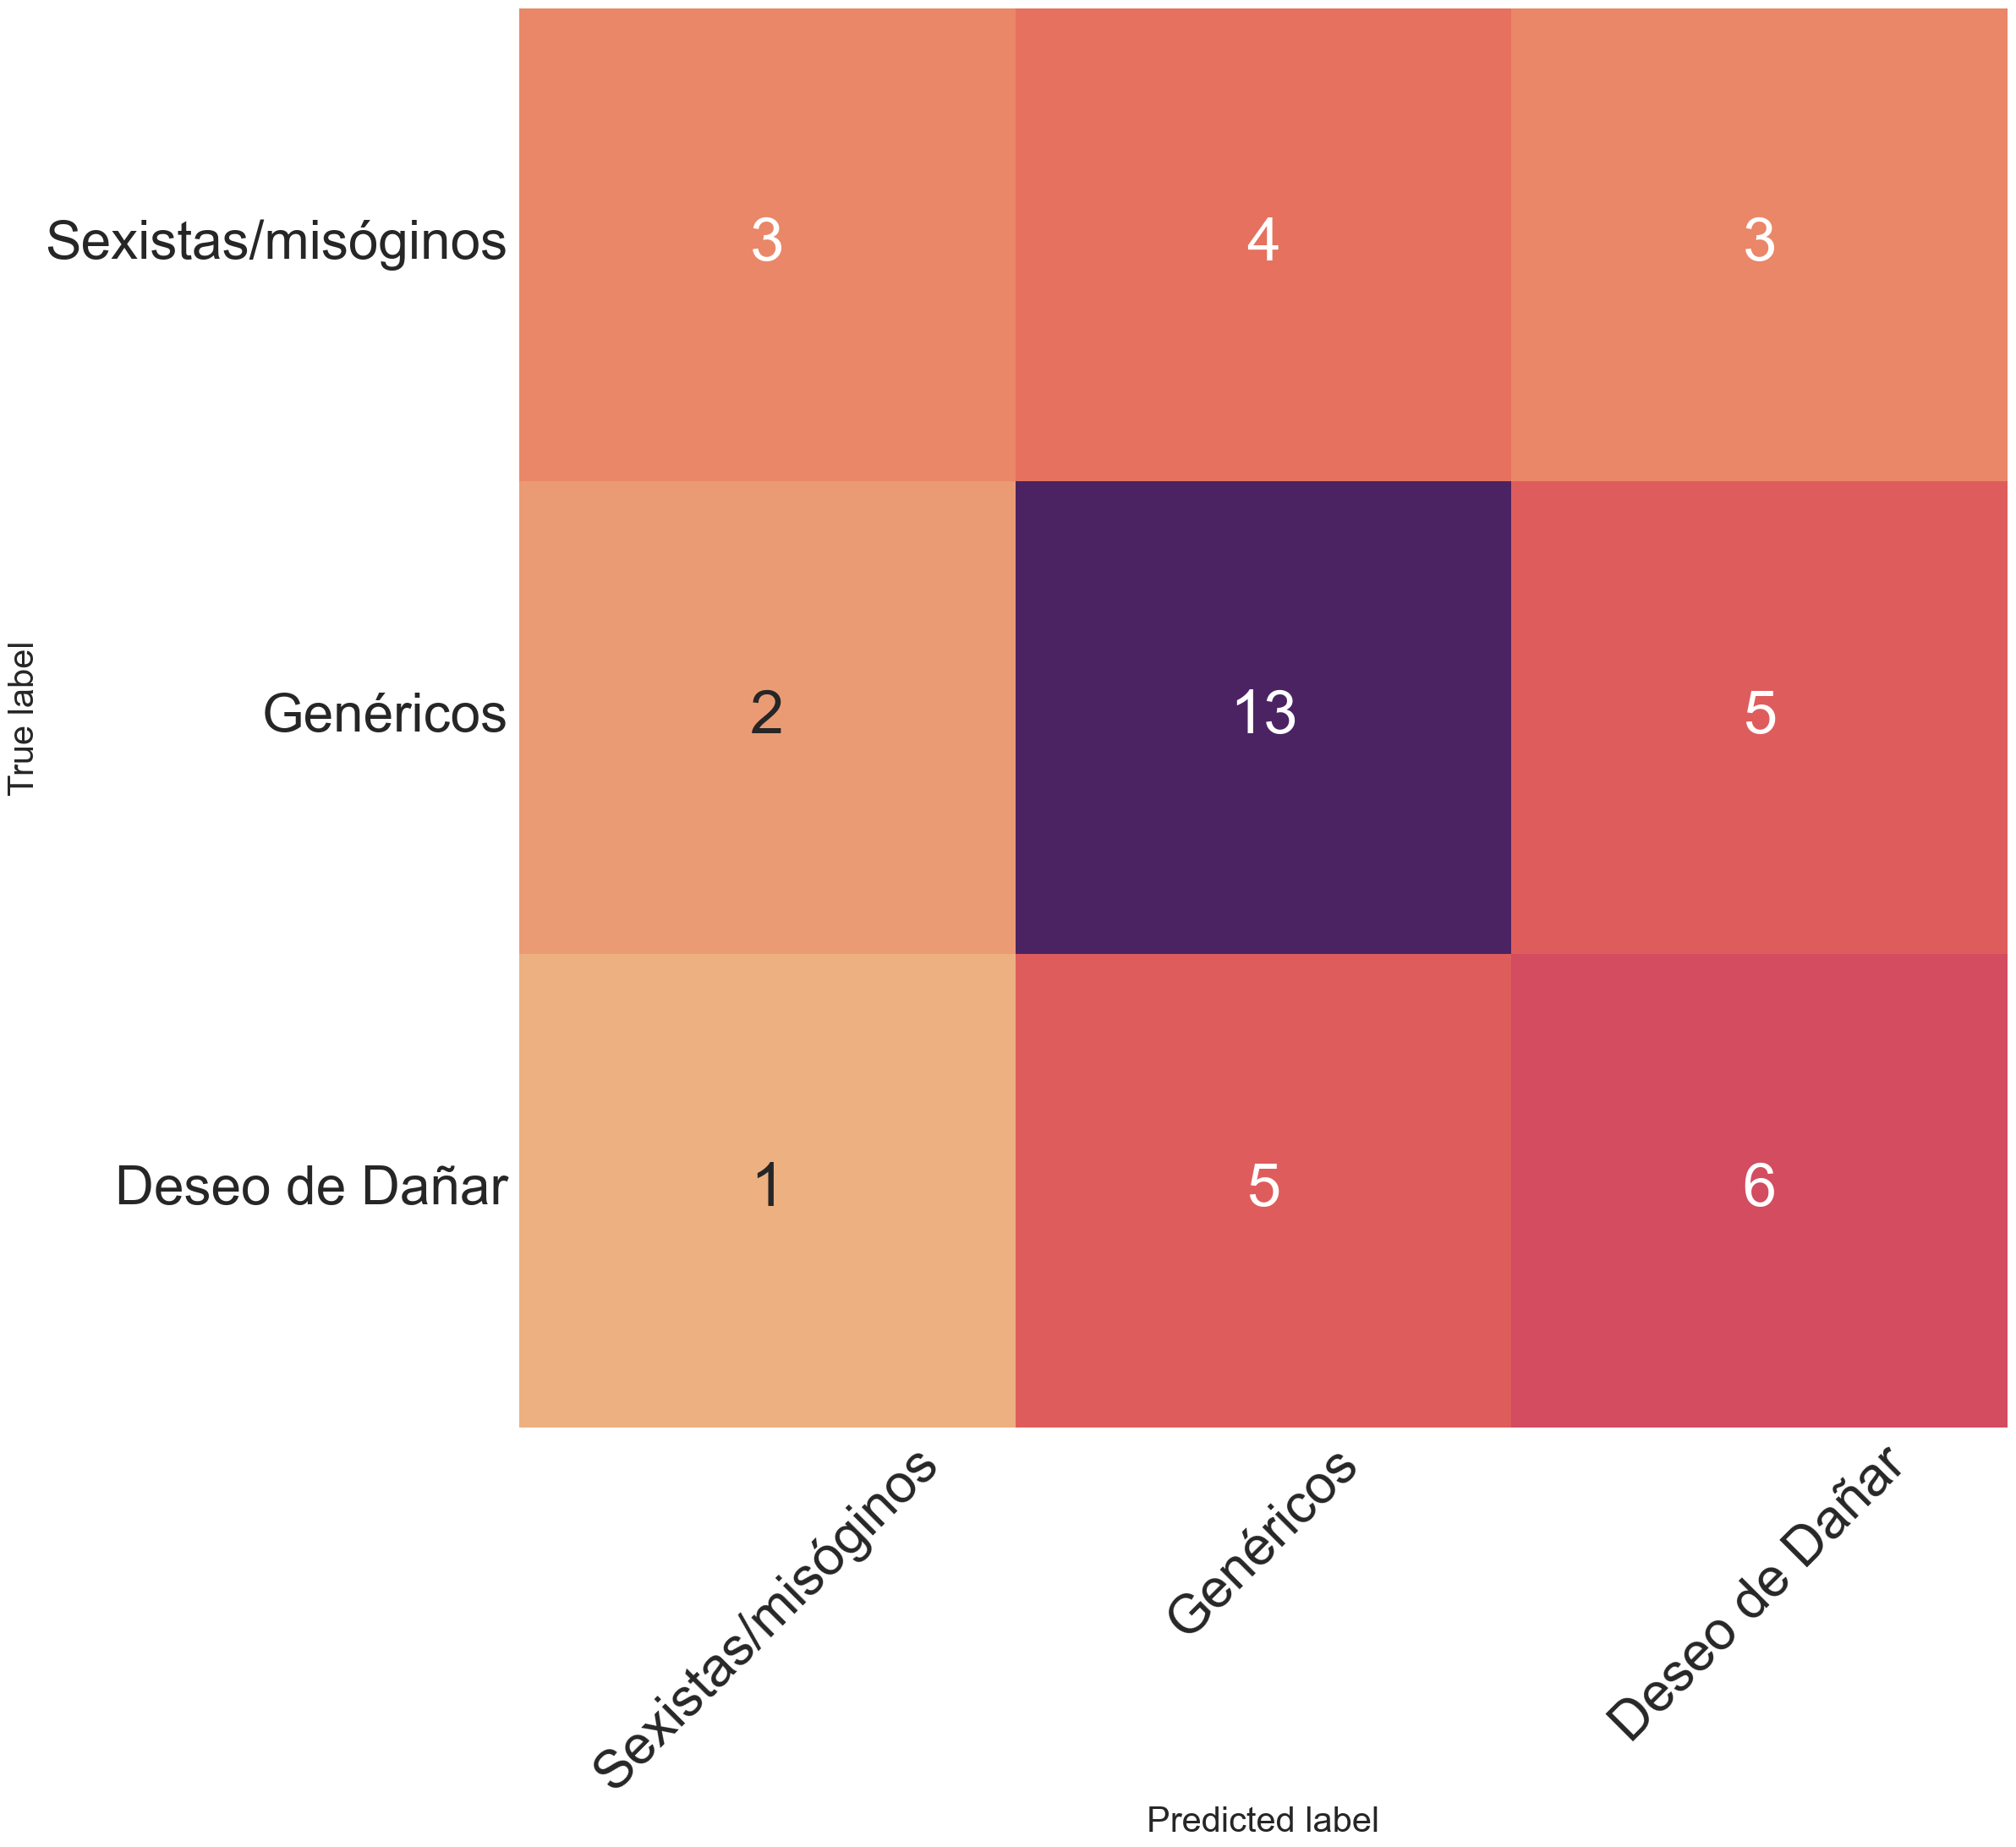

In [412]:
import ast
# ID del modelo para el que quieres extraer la matriz de confusión
model_id = '04f6baca-f95e-47d0-83f3-8c737b1f1c46'

# Extraer la matriz de confusión del DataFrame usando el ID
conf_matrix_str = df_INS_SC.loc[df_INS_SC['Run_ID'] == model_id, 'eval_confusion_matrix'].values[0]
conf_matrix = ast.literal_eval(conf_matrix_str)

# Crear la matriz de confusión
cm = pd.DataFrame(conf_matrix, index=labels, columns=labels)

# Plotear la matriz de confusión
plt.figure(figsize=(24, 22))

sns.heatmap(cm, annot=True, fmt='d', cmap='flare', xticklabels=labels, 
            yticklabels=labels, annot_kws={"size": 52}, cbar=False)

plt.xlabel('Predicted label', fontsize=30)
plt.ylabel('True label', fontsize=30)
plt.xticks(rotation=45, fontsize=46)
plt.yticks(rotation=0, fontsize=46)
# plt.title('Confusion Matrix for Best Model of ML Experiments')

plt.tight_layout()

# Save the plot as a PDF file
plt.savefig("../../../IMAGES/Insultos/DL/DL_Experiments in _Insultos_ best_model.pdf", format='pdf')

plt.show()

In [152]:
#{'Sexistas/misóginos': 0, 'Genéricos': 1, 'Deseo de Dañar': 2}

## Performance

In [153]:
# Concatenar df_AG_join, df_CNEG_join y df_INS_join
df_all = pd.concat([df_AG_join.assign(Task='Análisis General'), 
                    df_CNEG_join.assign(Task='Contenido Negativo'), 
                    df_INS_join.assign(Task='Insultos')])

In [154]:
# Mapping dictionary for task names
task_name_mapping = {
    "analisis_general": "Análisis General", 
    "contenido_negativo": "Contenido Negativo", 
    "insultos": "Insultos"
}

# Agrupar el DataFrame `df_all` por 'Type' y calcular la suma, promedio y número de experimentos del 'Time (s)'
df_all_grouped_sum = df_all.groupby(['Task'])['Total Time'].sum().reset_index()
df_all_grouped_mean = df_all.groupby(['Task'])['Total Time'].mean().reset_index()
df_all_grouped_count = df_all.groupby(['Task'])['Total Time'].count().reset_index()

# Fusionar las agrupaciones en un solo DataFrame
df_all_grouped = df_all_grouped_sum.merge(df_all_grouped_mean, on='Task', suffixes=('_Total', '_Mean'))
df_all_grouped = df_all_grouped.merge(df_all_grouped_count, on='Task')

# Renombrar las columnas para mayor claridad
df_all_grouped.columns = ['Task', 'Total Time (s)', 'Mean Time (s)', 'Number of Experiments']

# Convert seconds to hours and round to 3 decimal places
df_all_grouped['Total Time (h)'] = (df_all_grouped['Total Time (s)'] / 3600).round(3)
df_all_grouped['Mean Time (h)'] = (df_all_grouped['Mean Time (s)'] / 3600).round(3)

# Apply the mapping to change the task names
df_all_grouped['Task'] = df_all_grouped['Task'].replace(task_name_mapping)

# Drop the original time in seconds columns if not needed
df_all_grouped = df_all_grouped[['Task', 'Total Time (h)', 'Mean Time (h)', 'Number of Experiments']]

df_all_grouped


,Task,Total Time (h),Mean Time (h),Number of Experiments
0,Análisis General,49.486,4.499,11
1,Contenido Negativo,7.417,0.530,14
2,Insultos,4.422,0.316,14


C:\Users\jorge\AppData\Local\Temp\ipykernel_36740\735912916.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, x='Task', y='Number of Experiments', data=df_all_grouped, palette='bone', alpha=0.9)


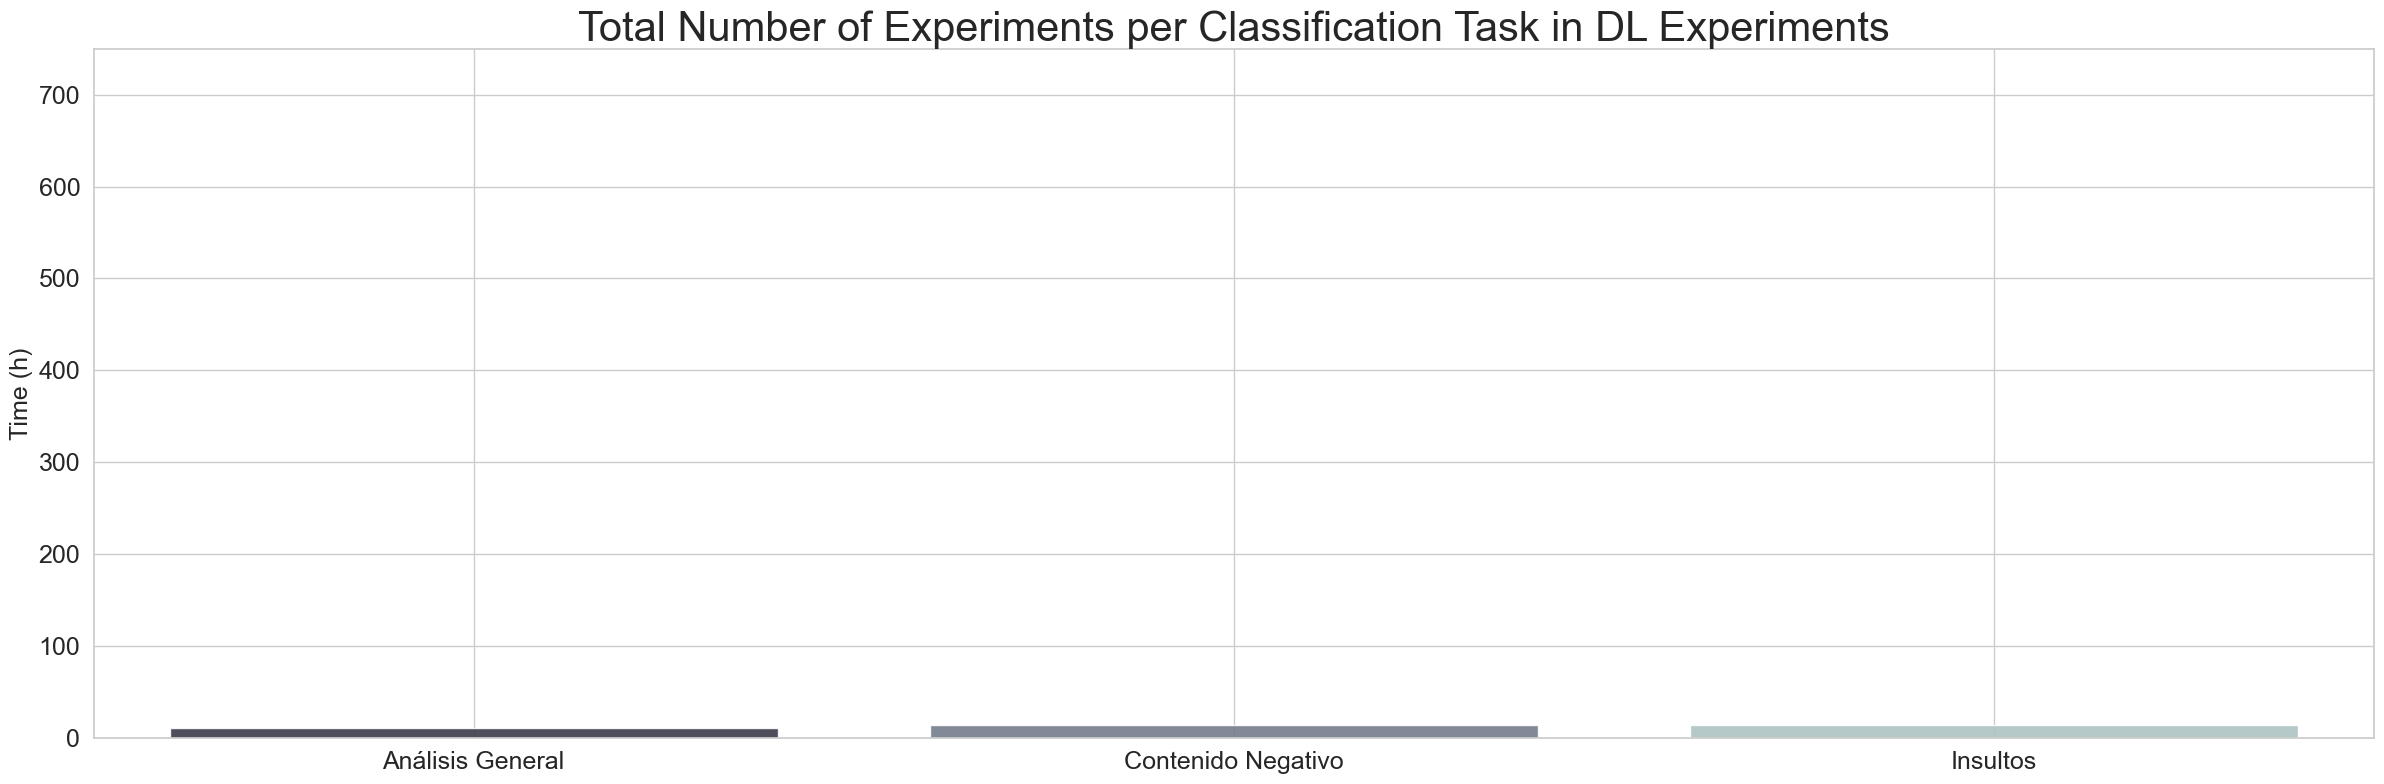

In [155]:
# Set Seaborn style
sns.set(style="whitegrid")

# Maximum per limit for the y-axis between ML, DL and GenAI
y_max = 750

# Create a figure with subplots
fig, ax = plt.subplots(figsize=(24, 8))

# Plot for Total Time usando los colores personalizados
sns.barplot(ax=ax, x='Task', y='Number of Experiments', data=df_all_grouped, palette='bone', alpha=0.9)

# Set plot title and labels
ax.set_title('Total Number of Experiments per Classification Task in DL Experiments', fontsize=30)
ax.set_xlabel('', fontsize=18)
ax.set_ylabel('Time (h)', fontsize=18)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.set_ylim(0, y_max)


# Adding grid for better readability
ax.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

C:\Users\jorge\AppData\Local\Temp\ipykernel_36740\2686097875.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, x='Task', y='Total Time (h)', data=df_all_grouped, palette='bone', alpha=0.9)


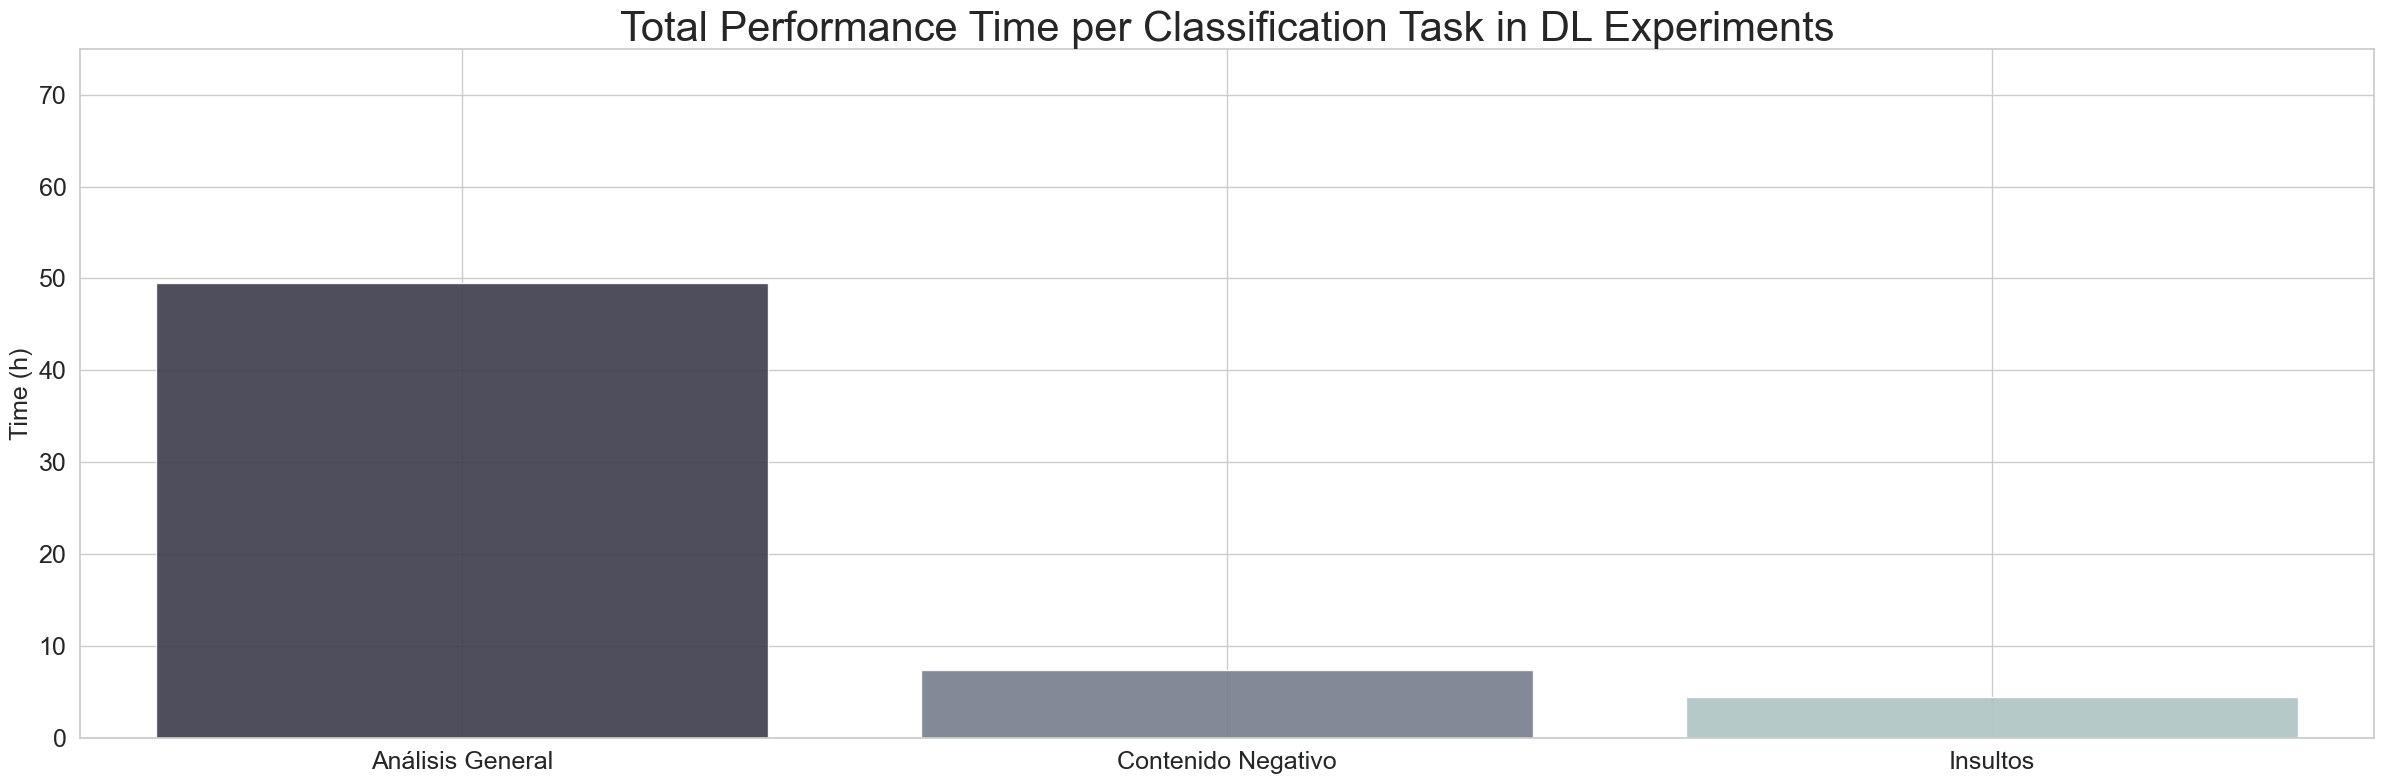

In [156]:
# Set Seaborn style
sns.set(style="whitegrid")

# Maximum pper limit for the y-axis between ML, DL and GenAI
y_max = 75

# Create a figure with subplots
fig, ax = plt.subplots(figsize=(24, 8))

# Plot for Total Time usando los colores personalizados
sns.barplot(ax=ax, x='Task', y='Total Time (h)', data=df_all_grouped, palette='bone', alpha=0.9)

# Set plot title and labels
ax.set_title('Total Performance Time per Classification Task in DL Experiments', fontsize=30)
ax.set_xlabel('', fontsize=18)
ax.set_ylabel('Time (h)', fontsize=18)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.set_ylim(0, y_max)


# Adding grid for better readability
ax.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


C:\Users\jorge\AppData\Local\Temp\ipykernel_36740\3510356135.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, x='Task', y='Total Time (h)', data=df_all_grouped, palette=bar_colors, alpha=0.9)


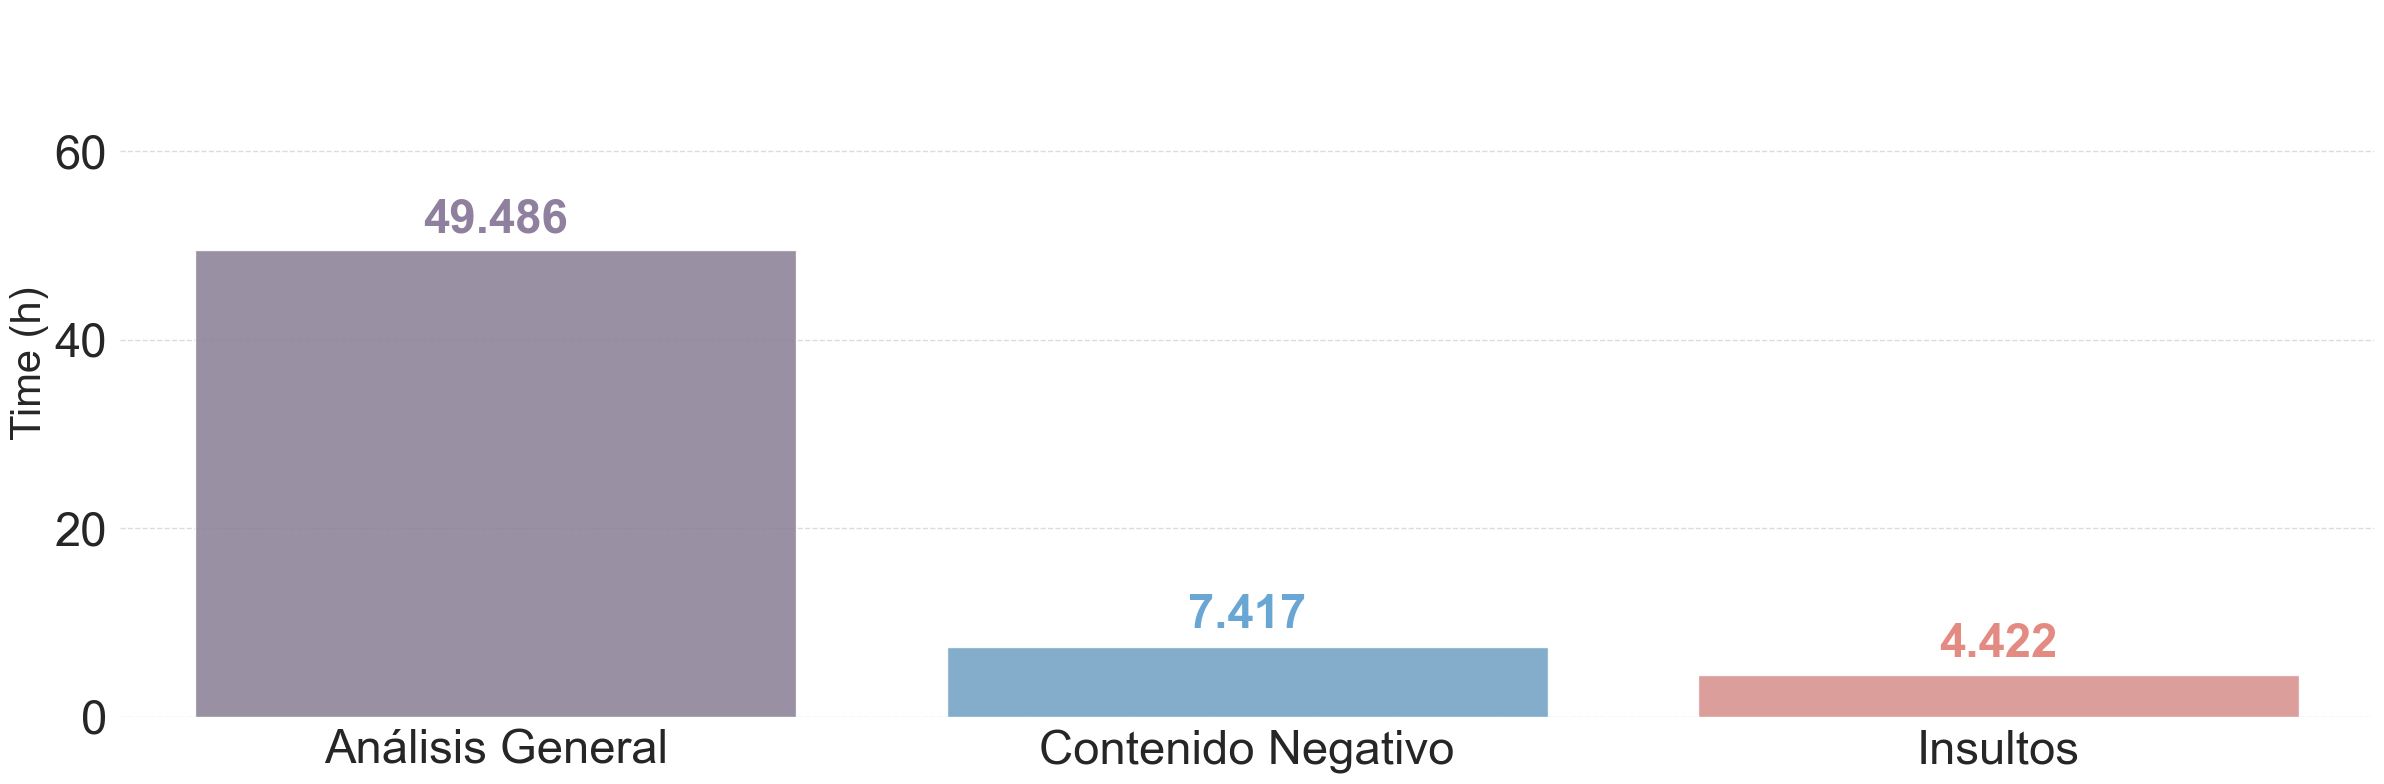

In [158]:
# Set Seaborn style
sns.set(style="whitegrid")

# Maximum per limit for the y-axis between ML, DL and GenAI
y_max = 75

# Define colors for specific tasks
task_colors = {
    'Análisis General': '#8E809E',
    'Contenido Negativo': '#6AA6D4',
    'Insultos': '#E38A83'
}

# Create a list of colors for the bars based on the task
bar_colors = [task_colors.get(task, '#CCCCCC') for task in df_all_grouped['Task']]  # Default color is light grey if not specified

# Create a figure with subplots
fig, ax = plt.subplots(figsize=(24, 8))

# Plot for Total Time using the customized colors
sns.barplot(ax=ax, x='Task', y='Total Time (h)', data=df_all_grouped, palette=bar_colors, alpha=0.9)

# Set plot title and labels
# ax.set_title('Total Performance Time per Classification Task in ML Experiments', fontsize=40)
ax.set_xlabel('', fontsize=20)
ax.set_ylabel('Time (h)', fontsize=30)
ax.tick_params(axis='x', labelsize=34)
ax.tick_params(axis='y', labelsize=34)
ax.set_ylim(0, y_max)

# Add value labels on top of the bars in the same color as the bars
for bar, color in zip(ax.patches, bar_colors):
    yval = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval:.3f}',
        ha='center', va='bottom', fontsize=34, fontweight='bold',
        color=color  # Match text color with the bar color
    )

# Add a grid to improve readability
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Remove spines for a clean look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Adjust layout to avoid clipping of labels and titles
plt.tight_layout()

# Save the plot as a PDF file
plt.savefig("../../../IMAGES/DL_total_performance_time.pdf", format='pdf')

plt.show()

C:\Users\jorge\AppData\Local\Temp\ipykernel_36740\16284170.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, x='Task', y='Mean Time (h)', data=df_all_grouped, palette='bone', alpha=0.9)


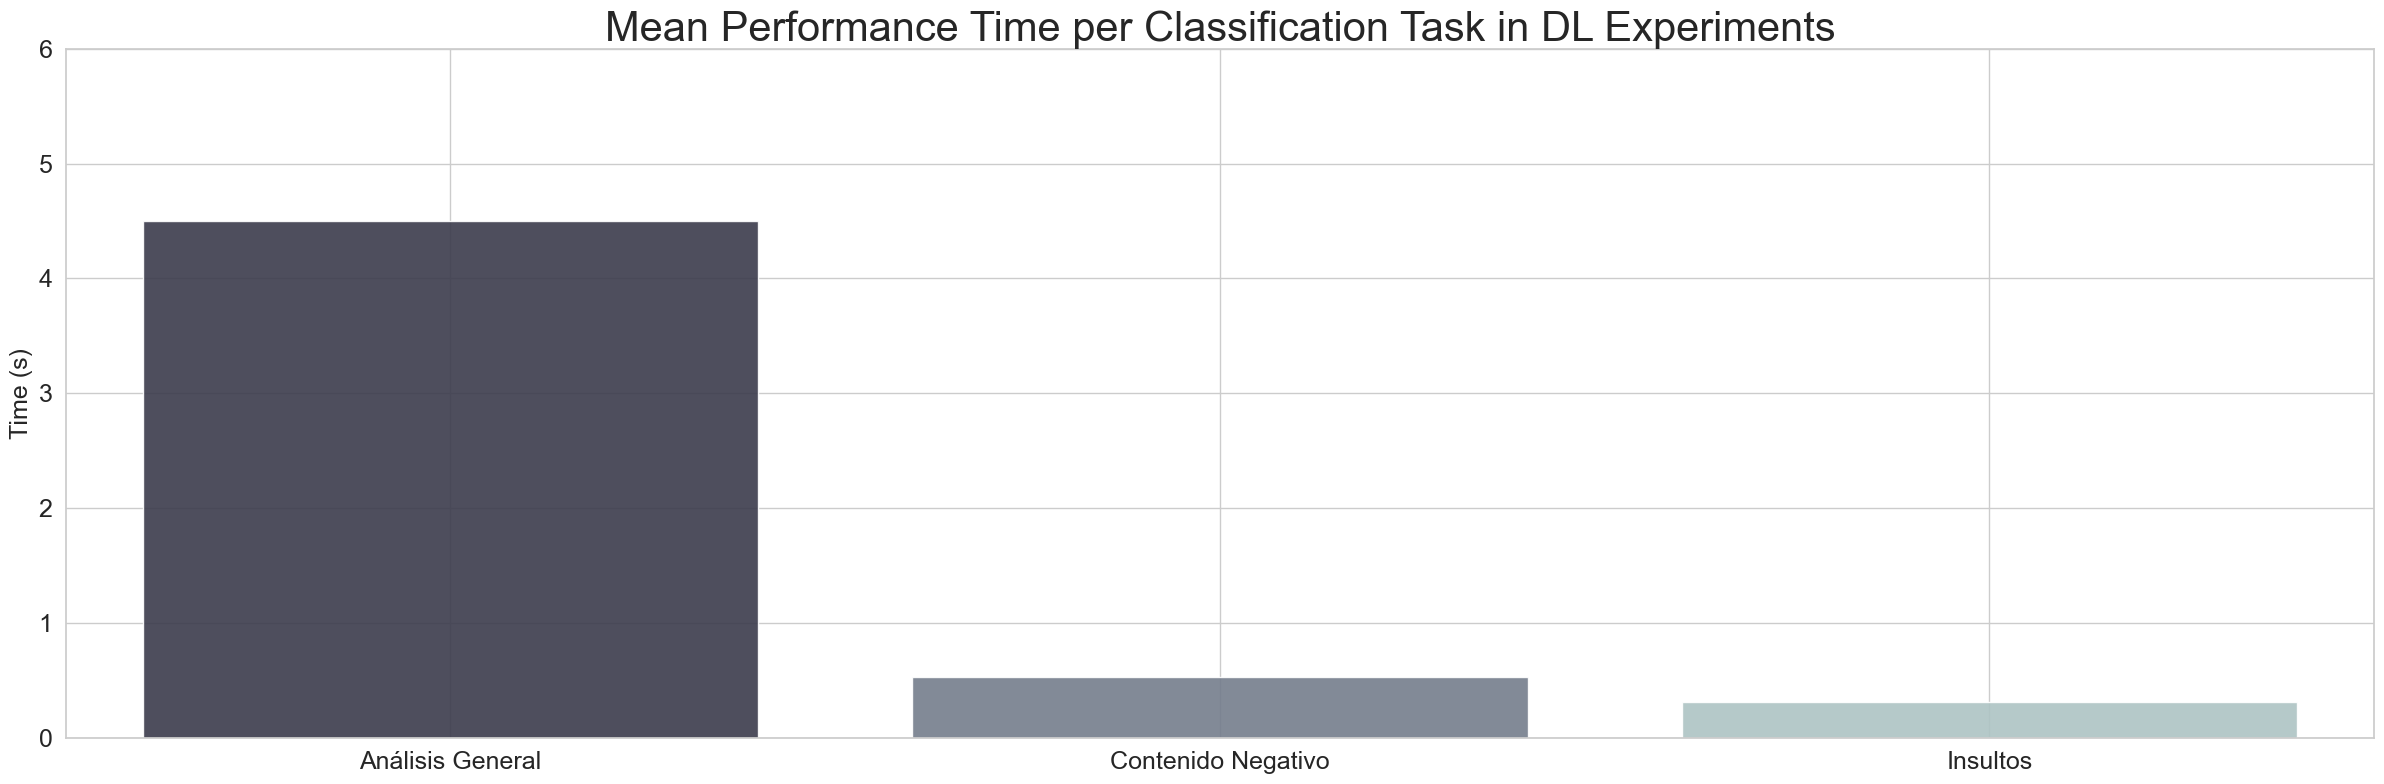

In [39]:
# Set Seaborn style
sns.set(style="whitegrid")

# Maximum pper limit for the y-axis between ML, DL and GenAI
y_max = 6

# Create a figure with subplots
fig, ax = plt.subplots(figsize=(24, 8))

# Plot for Total Time usando los colores personalizados
sns.barplot(ax=ax, x='Task', y='Mean Time (h)', data=df_all_grouped, palette='bone', alpha=0.9)

# Set plot title and labels
ax.set_title('Mean Performance Time per Classification Task in DL Experiments', fontsize=30)
ax.set_xlabel('', fontsize=18)
ax.set_ylabel('Time (s)', fontsize=18)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.set_ylim(0, y_max)


# Adding grid for better readability
ax.grid(True)

# Show the plot
plt.tight_layout()
plt.show()